<a href="https://colab.research.google.com/github/VijayendraDwari/tabnet/blob/develop/Capstone_ThriveDX_Nudging_Model_by__Group_run2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### STUDENT NUDGING ML MODEL FOR THRIVE DX

**Capstone Project POC Model** 

Submitted by:

**BrajPal Singh	12020101 | Nishanth	12020083 | Siddharth S	12020036 | Sricharan	12020090 | Vijayendra D	12020055**



The goal of this notebook is to provide a nudge when a student is stuck solving a problem / question / during test / during working in a sandbox, for ThriveDX, a leading global EdTech provider offering cyber security training and digital skills programs. 



- POC Output of the project will be ML model which will trigger the Nudge.

**Data Dictionary:** The features identified and used are defined below

- **userid** - Unique user id , identifes the user uniquely
- **date_account_created** - The exact date when the user signed up and created an account
- **gender** - The gender of user 
- **age** - The exact age of the user
- **location** - Country of residence where user is based at
- **current_bootcamp_course** - The current course user is undertaking
- **current_module** - The current module/chapter where user currently is right now
- **current_challenge** - The current challenge which user is attempting currently
- **['tc1','tc2', 'tc3', 'tc4', 'tc5', 'tc6', 'tc7', 'tc8', 'tc9', 'tc10']** - Represents time taken in all challenges for a user, the current challenge being attemted is coded as "inprogress"
- **signup_app** - The app used to signup the user
- **device_type** - The device type user is currently using
- **browser** - The current browser user is using

                            
 **The initial dataset for our challenge is inspired by a similar challenge, atleast for the first half of the problem using a Kaggle Dataset by AIR BNB, source mentioned below. However we have built on it and modified the dataset structure and features heavily to suit our needs. Only the structure of streaming data and how to use it for realtime predictions was borrowed from the below mentioned source.**
                             
 ##### [3] source: https://www.kaggle.com/competitions/airbnb-recruiting-new-user-bookings/data

In [183]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import random,warnings
warnings.filterwarnings('ignore')

#np.random.seed(0)

In [184]:
#from google.colab import files
#uploaded = files.upload()

In [185]:
import pandas as pd
import io
  
df = pd.read_csv('user_data_new.csv')
df


,userid,date_account_created,timestamp_first_active,date_first_enrollment,gender,age,location,current_bootcamp_course,current_module,current_challenge,signup_app,device_type,browser
0,2b5014acb1,24/05/2003,1.372830e+12,NaN,NaN,57,India,UI,SEO,challenge4,MOB,Android,Firefox
1,77e98852b5,17/02/2014,1.403480e+12,12/08/2002,FEMALE,56,India,UI,SEO,challenge7,WEB,Mac Desktop,Chrome
2,bea83d8b93,14/03/2004,1.335460e+12,24/10/2005,-unknown-,30,India,SO,UI/UX,challenge2,MOB,Other/Unknown,Safari
3,c12f3433d2,12/06/2019,1.577440e+12,NaN,-unknown-,59,India,SO,UI/UX,challenge9,WEB,Other/Unknown,Safari
4,9392aeb546,13/12/2010,1.514190e+12,25/10/2019,NaN,47,India,DS,NaN,NaN,WEB,Windows Desktop,Chrome
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49603d40a4,27/06/2013,1.546320e+12,NaN,FEMALE,48,Canada,UI,ecommerce,challenge3,WEB,Windows Desktop,Chrome
9996,d32f13528a,11/05/2018,1.570790e+12,NaN,FEMALE,28,Canada,CY,contentMarketing,challenge6,WEB,Windows Desktop,Chrome
9997,9d3f3659b2,04/03/2018,1.575410e+12,NaN,MALE,22,Canada,DI,contentMarketing,challenge96,WEB,Mac Desktop,-unknown-
9998,26187f36b8,22/07/2010,1.340530e+12,NaN,FEMALE,44,Canada,DI,NaN,NaN,WEB,Mac Desktop,-unknown-


#### We have carefully mapped the courses and modules in each courses as per actual data from ThriveDX platform. The source of all such information in this dataset is

https://thrivedx.com/for-education#

![image.png](attachment:image.png)

In [186]:
#We will create dataframes for each course and assign course modules randomly 

df_CY = df[df.current_bootcamp_course =='CY']

values = ['MicrosoftSecurity', 'ComputerNetworking', 'CloudSecurity', 'NetworkSecurity',
            'LinuxSecurity','CyberInfra&Tech','PythonforSecurity','EthicalHacking',
              'DFIR&ThreatHunting','GameTheoryinCY'
         ]
df_CY['current_module'] = np.random.choice(list(values), len(df_CY))

df_UI = df[df.current_bootcamp_course =='UI']

values = ['ThinkLikeaDesigner', 'VirtualDesign', 'UIDesign', 'UXDesign',
            'ConductingResearch','Ideating&Prototyping','UsabilityTesting','HFDesign',
              'MicroInteractions','FrontEnd','DigitalMarketing'
         ]
df_UI['current_module'] = np.random.choice(list(values), len(df_UI))

df_SO = df[df.current_bootcamp_course =='SO']

values = ['HTML&Webaccessibilty', 'CSS&Frameworks', 'UX&UID', 'Javascript&F-EWD',
            'BE&APIs','React&Redux','SQL&DataModeling','CyberSecurity',
              'Python','AdvancedTopics'
         ]
df_SO['current_module'] = np.random.choice(list(values), len(df_SO))

df_DI = df[df.current_bootcamp_course =='DI']

values = ['MarketingFundamentals', 'ContentMarketing', 'CRM', 'WDforMarketers',
            'UX','E-Commerce','DA&Visualization','SEO',
              'EmailMarketing','SMM','SEM','DigitalStrategy'
         ]
df_DI['current_module'] = np.random.choice(list(values), len(df_DI))

df_DS = df[df.current_bootcamp_course =='DS']

values = ['SQL&Databases', 'Stats&Prob', 'DataStorytelling', 'AdvancedSQL',
            'PythonProgramming','DataWrangling','VisualCommunications','BI',
              'ML','BigData','AppliedAI'
         ]
df_DS['current_module'] = np.random.choice(list(values), len(df_DS))

#Join all course dataframes to make one dataframe
ndf = pd.concat([df_CY,df_SO,df_UI,df_DI,df_DS], axis=0, join='outer')

#Assign random challenge number to each user
values = [1,2,3,4,5,6,7,8,9,10 ]
ndf['current_challenge'] = np.random.choice(list(values), len(ndf))

#Assign random country from a list to each user
values = ['Italy','USA','Singapore','Indonesia','Malaysia','India','Germany',
          'Israel','Canada','Australia','Spain','Sweden','France','Japan','China','Vietnam'
         ]

ndf['location'] = np.random.choice(list(values), len(ndf))

from sklearn.utils import shuffle
ndf = shuffle(ndf)
ndf = ndf.reset_index(drop=True)


In [187]:
#Loop to insert tc1 ... tc10 for ach user
for i in range(len(ndf)):
    c = ndf.loc[i]["current_challenge"]
    
    for j in range(10-c):
        tcn = str("tc")+str(10-j)
        ndf.at[i, tcn] = -1
        
    for k in range(c-1):
        values = range(120, 3000, 150)
        tcn2 = str("tc")+str(k+1)
        ndf.at[i, tcn2] = np.random.choice(list(values), 1)

In [188]:
ndf['tc1'] = ndf['tc1'].fillna("inprogress")
ndf['tc2'] = ndf['tc2'].fillna("inprogress")
ndf['tc3'] = ndf['tc3'].fillna("inprogress")
ndf['tc4'] = ndf['tc4'].fillna("inprogress")
ndf['tc5'] = ndf['tc5'].fillna("inprogress")
ndf['tc6'] = ndf['tc6'].fillna("inprogress")
ndf['tc7'] = ndf['tc7'].fillna("inprogress")
ndf['tc8'] = ndf['tc8'].fillna("inprogress")
ndf['tc9'] = ndf['tc9'].fillna("inprogress")
ndf['tc10'] = ndf['tc10'].fillna("inprogress")

#ndf.to_csv("user_data_cleaned9g.csv")
ndf

,userid,date_account_created,timestamp_first_active,date_first_enrollment,gender,age,location,current_bootcamp_course,current_module,current_challenge,...,tc10,tc9,tc8,tc7,tc6,tc5,tc4,tc3,tc1,tc2
0,1744049b48,18/12/2005,1.399090e+12,25/02/2010,FEMALE,41,China,UI,DigitalMarketing,2,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2820.0,inprogress
1,0c70c3e846,05/12/2019,1.576270e+12,25/12/2017,FEMALE,23,USA,SO,Python,9,...,-1.0,inprogress,1770.0,870.0,2520.0,2670.0,1620.0,420.0,1320.0,1020.0
2,3213d35979,25/08/2006,1.529100e+12,NaN,NaN,55,China,UI,Ideating&Prototyping,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,inprogress,-1.0
3,51a8a801b0,11/09/2008,1.400410e+12,NaN,MALE,22,Australia,CY,CyberInfra&Tech,9,...,-1.0,inprogress,1620.0,2520.0,570.0,2220.0,570.0,1020.0,270.0,1620.0
4,140e655dee,13/02/2000,9.897620e+11,14/02/2015,FEMALE,39,Indonesia,CY,CyberInfra&Tech,9,...,-1.0,inprogress,1620.0,420.0,1920.0,2820.0,1920.0,1920.0,2070.0,720.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,e766d21570,15/06/2006,1.160290e+12,NaN,NaN,39,Israel,UI,ThinkLikeaDesigner,4,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,inprogress,2220.0,720.0,2820.0
9996,5ec9350467,11/03/2017,1.545620e+12,10/08/2009,-unknown-,20,Canada,DI,UX,8,...,-1.0,-1.0,inprogress,2970.0,420.0,1170.0,120.0,870.0,2520.0,2820.0
9997,a72a69956b,18/09/2014,1.413530e+12,NaN,NaN,26,Indonesia,UI,Ideating&Prototyping,4,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,inprogress,2970.0,1920.0,2970.0
9998,595c442135,04/05/2000,1.272370e+12,NaN,MALE,54,Vietnam,DS,PythonProgramming,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,inprogress,-1.0


In [189]:

 
dfs = pd.read_csv('TransactionalDatanew.csv')
dfs

,session_id,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,A133186A73DA481590EF4FE2F4020758,2b5014acb1,lookup,NaN,NaN,Android,18641
1,B84B15C3224E4A7B9CEB4D09A1FCC75C,2b5014acb1,index,NaN,NaN,Android,18342
2,E9E8CF4B08C24FCF97ADAE9CD46CA1F4,2b5014acb1,show,data,similar_topics,Android,996
3,3B105048092F42F38F3792F1C35F1E2C,2b5014acb1,index,data,similar_topics,Android,8844
4,A785F5C682A1469793DADE7D19955D55,2b5014acb1,index,view,p3,Android,11532
...,...,...,...,...,...,...,...
99995,E9F76810E9754D16B3E69BB095E159EA,c63dd1767d,similar_topics,data,similar_topics,iPhone,464
99996,C68420BB930345B8861020A2B27E6A80,c63dd1767d,lookup,data,whishlist_content_update,iPhone,103
99997,44F3164E0FBE4240B41E24AB143E3DDD,c63dd1767d,read_text,data,whishlist_content_update,iPhone,718
99998,C2BC8B315B564E66B442E3C8A8223E4A,c63dd1767d,index,click,view_search_results,iPhone,801


In [190]:

values = range(120, 3000, 150)

dfs['secs_elapsed'] = np.random.choice(list(values), len(dfs))

values = ['-unknown-','submit_answer','click','data','message_help','help_callback','view'
         ]

dfs['action_type'] = np.random.choice(list(values), len(dfs))

values = ['-unknown-','account_notification_settings','contact_host','login','login_modal','login_page','lookup_message_thread',
          'manage_listing','message_inbox','message_post','message_thread','message_to_host_change','message_to_host_focus',
          'notifications','oauth_login','oauth_response','p1','p3','p4','terms_and_privacy','toggle_archived_thread',
          'toggle_starred_thread','user_wishlists','view_listing','view_search_results','wishlist','wishlist_content_update',
          'wishlist_note','update_listing','update_listing_description','update_user','update_user_profile','user_friend_recommendations','user_languages','user_listings',
          'user_profile','user_profile_content_update'
         ]

dfs['action_detail'] = np.random.choice(list(values), len(dfs))

#dfs.to_csv("TransactionalDatanew_cleanedg.csv")
print(dfs.columns)
dfs

Index(['session_id', 'user_id', 'action', 'action_type', 'action_detail',
       'device_type', 'secs_elapsed'],
      dtype='object')


,session_id,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,A133186A73DA481590EF4FE2F4020758,2b5014acb1,lookup,help_callback,wishlist,Android,120
1,B84B15C3224E4A7B9CEB4D09A1FCC75C,2b5014acb1,index,click,login_page,Android,2670
2,E9E8CF4B08C24FCF97ADAE9CD46CA1F4,2b5014acb1,show,data,p3,Android,2820
3,3B105048092F42F38F3792F1C35F1E2C,2b5014acb1,index,click,account_notification_settings,Android,1020
4,A785F5C682A1469793DADE7D19955D55,2b5014acb1,index,help_callback,wishlist_note,Android,2370
...,...,...,...,...,...,...,...
99995,E9F76810E9754D16B3E69BB095E159EA,c63dd1767d,similar_topics,data,message_inbox,iPhone,2970
99996,C68420BB930345B8861020A2B27E6A80,c63dd1767d,lookup,message_help,login,iPhone,270
99997,44F3164E0FBE4240B41E24AB143E3DDD,c63dd1767d,read_text,data,-unknown-,iPhone,2670
99998,C2BC8B315B564E66B442E3C8A8223E4A,c63dd1767d,index,click,user_friend_recommendations,iPhone,1470


In [191]:

dfu = pd.read_csv("user_data_cleaned9g.csv")
dfu=dfu.drop('timestamp_first_active',axis=1)
dfu

,userid,date_account_created,date_first_enrollment,gender,age,location,current_bootcamp_course,current_module,current_challenge,tc1,...,tc4,tc5,tc6,tc7,tc8,tc9,tc10,signup_app,device_type,browser
0,bb8e1ed703,02-04-2006,14-11-2019,NaN,56,China,CY,DFIR&ThreatHunting,9,2370,...,120,2820,120,1470,870,inprogress,-1,WEB,Mac Desktop,Firefox
1,aa5a930f29,07-12-2001,NaN,-unknown-,56,Japan,DI,CRM,3,2070,...,-1,-1,-1,-1,-1,-1,-1,WEB,Other/Unknown,Firefox
2,9e142477e7,20-02-2017,NaN,-unknown-,56,China,UI,Ideating&Prototyping,1,inprogress,...,-1,-1,-1,-1,-1,-1,-1,WEB,Mac Desktop,-unknown-
3,c41484e43c,11-06-2001,NaN,MALE,32,Singapore,UI,ThinkLikeaDesigner,2,270,...,-1,-1,-1,-1,-1,-1,-1,MOB,Android,Firefox
4,c914db2ee0,13-08-2000,16-06-2004,-unknown-,43,Spain,CY,GameTheoryinCY,4,1620,...,inprogress,-1,-1,-1,-1,-1,-1,WEB,Mac Desktop,Firefox
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2119251de0,29-11-2019,22-06-2013,MALE,36,Australia,CY,MicrosoftSecurity,4,1020,...,inprogress,-1,-1,-1,-1,-1,-1,MOB,iPhone,Safari
9996,30cc9eb276,27-11-2016,16-01-2006,FEMALE,48,Spain,DS,BI,8,1170,...,2520,2820,1770,1470,inprogress,-1,-1,WEB,Other/Unknown,Safari
9997,1c6aeca199,13-11-2016,07-10-2016,NaN,52,Italy,DS,DataStorytelling,1,inprogress,...,-1,-1,-1,-1,-1,-1,-1,WEB,Windows Desktop,Chrome
9998,5f9f1956d1,16-06-2000,06-04-2014,-unknown-,41,Israel,DI,SEM,2,870,...,-1,-1,-1,-1,-1,-1,-1,WEB,Mac Desktop,Chrome


#### The above chunk of code is using numpy random function to fill predesignated list of values to all variables we have identified. We have saved these in separate csv files which acts as input for the next phase of our code.

#### We start by loading our hand coded dataset

- We have a master user table containing all information about the user - has total **10000 entries, meaning 10 K** unique users
- We have a session table which tracks all sessions and captures the most relevant data in terms of recency. - has **total 100000 entries**,total 100 K sessions for 10 K unique users are captured in this table.

**A combination of the two tables should be able to give us the data we need to create our Nudge Model.**


#### In the table above we have introduced new hand coded variables described below

- tc1......tc10. This series of variables represent **"time taken in solving a challenge"** , since we dont have historical data we propose to create and use such variables to capture time taken in solving challenges which will lead to the Nudge Variable we are trying to create.

- for example if a user is currently attempting challenge 5 the **tc1 - tc4** will have continiuos time values since those challenges are completed in a certain time , the ongoing challenge is coded as **"inprogress"** and the challenge yet to be done **tc6 to tc10** are coded as "-1".


- We have assumed challenges to be equal numbers, numbered 1 to 10 for each course, which may not be the case in real life. In real life each course may have different number of associated challenges. We donot have that data available.


- Even so, in such case this **code can be easily modified** to accomodate such scenarios. We also assume here that the challenges for each course are sequentially increasing in difficulty level. Out of 10 the first 4 are EASY, the next 4 are MEDIUM and the last 2 are rated as HARD.


- Since it's a POC and a genralised model for all courses we are making these assumptions, **using the same code we can also create specific separate models for each course** with real life challenge and difficulty level data.The difficulty level of challenges are predfined as below.In case of a LMS platform like ThriveDX, we surely have a CMS defining challenges after each module.





In [192]:
easy = [1,2,3,4]
medium = [5,6,7,8]
hard = [9,10]

for i in range(len(dfu)):
    c = dfu.loc[i]["current_challenge"]
    if c in [1,2,3,4]:
        dfu.at[i,'challenge_level'] = 1
    elif c in [9,10]:
        dfu.at[i,'challenge_level'] = 3
    else:
        dfu.at[i,'challenge_level'] = 2


#### Pre-defined challenegs in the content management system

In [193]:
dfu.challenge_level.value_counts()

1.0    4055
2.0    4025
3.0    1920
Name: challenge_level, dtype: int64

In [194]:
dfu
#dfu.to_csv("dfuser-challenge.csv")

,userid,date_account_created,date_first_enrollment,gender,age,location,current_bootcamp_course,current_module,current_challenge,tc1,...,tc5,tc6,tc7,tc8,tc9,tc10,signup_app,device_type,browser,challenge_level
0,bb8e1ed703,02-04-2006,14-11-2019,NaN,56,China,CY,DFIR&ThreatHunting,9,2370,...,2820,120,1470,870,inprogress,-1,WEB,Mac Desktop,Firefox,3.0
1,aa5a930f29,07-12-2001,NaN,-unknown-,56,Japan,DI,CRM,3,2070,...,-1,-1,-1,-1,-1,-1,WEB,Other/Unknown,Firefox,1.0
2,9e142477e7,20-02-2017,NaN,-unknown-,56,China,UI,Ideating&Prototyping,1,inprogress,...,-1,-1,-1,-1,-1,-1,WEB,Mac Desktop,-unknown-,1.0
3,c41484e43c,11-06-2001,NaN,MALE,32,Singapore,UI,ThinkLikeaDesigner,2,270,...,-1,-1,-1,-1,-1,-1,MOB,Android,Firefox,1.0
4,c914db2ee0,13-08-2000,16-06-2004,-unknown-,43,Spain,CY,GameTheoryinCY,4,1620,...,-1,-1,-1,-1,-1,-1,WEB,Mac Desktop,Firefox,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2119251de0,29-11-2019,22-06-2013,MALE,36,Australia,CY,MicrosoftSecurity,4,1020,...,-1,-1,-1,-1,-1,-1,MOB,iPhone,Safari,1.0
9996,30cc9eb276,27-11-2016,16-01-2006,FEMALE,48,Spain,DS,BI,8,1170,...,2820,1770,1470,inprogress,-1,-1,WEB,Other/Unknown,Safari,2.0
9997,1c6aeca199,13-11-2016,07-10-2016,NaN,52,Italy,DS,DataStorytelling,1,inprogress,...,-1,-1,-1,-1,-1,-1,WEB,Windows Desktop,Chrome,1.0
9998,5f9f1956d1,16-06-2000,06-04-2014,-unknown-,41,Israel,DI,SEM,2,870,...,-1,-1,-1,-1,-1,-1,WEB,Mac Desktop,Chrome,1.0


In [195]:
dfuc = dfu[['userid','current_challenge','tc1']]
dfuc

,userid,current_challenge,tc1
0,bb8e1ed703,9,2370
1,aa5a930f29,3,2070
2,9e142477e7,1,inprogress
3,c41484e43c,2,270
4,c914db2ee0,4,1620
...,...,...,...
9995,2119251de0,4,1020
9996,30cc9eb276,8,1170
9997,1c6aeca199,1,inprogress
9998,5f9f1956d1,2,870


#### We will use the information available for user's time taken to solve specific challenges and his current challenge number to create user segments.

In [196]:
# Identify and drop users with in progress sessions
indexNames = dfuc[dfuc['tc1'] == 'inprogress'].index
print(indexNames)
dfuc.drop(index = indexNames,inplace = True, axis =0)
dfuc


Int64Index([   2,   17,   35,   50,   75,   77,   86,   97,   98,  118,
            ...
            9919, 9930, 9936, 9942, 9945, 9952, 9958, 9965, 9971, 9997],
           dtype='int64', length=1049)


,userid,current_challenge,tc1
0,bb8e1ed703,9,2370
1,aa5a930f29,3,2070
3,c41484e43c,2,270
4,c914db2ee0,4,1620
5,4ca810b600,4,2520
...,...,...,...
9994,fae7bb09c3,5,720
9995,2119251de0,4,1020
9996,30cc9eb276,8,1170
9998,5f9f1956d1,2,870


**We now scale our data we are planning to use for clustering using Min Max scaler and apply KMeans clustering to segment users.** 

In [197]:
#scaling and segmentation

scaler = MinMaxScaler()
scale = scaler.fit_transform(dfuc[['current_challenge','tc1']])
df_scale = pd.DataFrame(scale, columns = ['current_challenge','tc1']);
print(df_scale.head(5))
km=KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_scale[['current_challenge','tc1']])
print("\npredicted segments:",y_predicted)

df_scale['user_segment'] = km.labels_
df_scale

   current_challenge       tc1
0              0.875  0.789474
1              0.125  0.684211
2              0.000  0.052632
3              0.250  0.526316
4              0.250  0.842105

predicted segments: [0 1 2 ... 0 2 0]


,current_challenge,tc1,user_segment
0,0.875,0.789474,0
1,0.125,0.684211,1
2,0.000,0.052632,2
3,0.250,0.526316,1
4,0.250,0.842105,1
...,...,...,...
8946,0.375,0.210526,2
8947,0.250,0.315789,2
8948,0.750,0.368421,0
8949,0.000,0.263158,2


#### Using KMeans clustering we have identified user segments, since the challenge difficulty increase sequentially and current user challenge also signifies his increasing expertise. These segments are a representation of where the user lies in terms of his expertise.

In [198]:
cols = list(dfu.columns)
unclustered = pd.DataFrame(columns = cols)

#### We create a 4th segment which represents all the user who are in currently challenge 1 and hence have not been clustered in any of the 3 buckets. 

In [199]:
indexNames = dfu[dfu['tc1']== 'inprogress'].index
print(indexNames)
unclustered = unclustered.append(dfu.loc[indexNames])
unclustered['user_segment'] = -1
unclustered.to_csv("unclustered-users.csv")

dfu.drop(index = indexNames,inplace = True, axis =0)
dfu['user_segment'] =  km.labels_

dfun = pd.concat([unclustered, dfu], axis=0, join='inner',ignore_index=True)

dfun = shuffle(dfun)
print(dfun.user_segment.value_counts())

dfun.reset_index(drop=True, inplace=True)
#dfun.to_csv("all-users-segmented.csv")
dfun


Int64Index([   2,   17,   35,   50,   75,   77,   86,   97,   98,  118,
            ...
            9919, 9930, 9936, 9942, 9945, 9952, 9958, 9965, 9971, 9997],
           dtype='int64', length=1049)
 0    3561
 2    2775
 1    2615
-1    1049
Name: user_segment, dtype: int64


,userid,date_account_created,date_first_enrollment,gender,age,location,current_bootcamp_course,current_module,current_challenge,tc1,...,tc6,tc7,tc8,tc9,tc10,signup_app,device_type,browser,challenge_level,user_segment
0,7d882b0dad,03-09-2015,NaN,NaN,24,India,DI,SMM,7,120,...,120,inprogress,-1,-1,-1,WEB,Windows Desktop,-unknown-,2.0,2
1,a7a43297d4,27-10-2009,30-11-2014,NaN,51,Italy,UI,ThinkLikeaDesigner,6,2370,...,inprogress,-1,-1,-1,-1,WEB,Other/Unknown,Firefox,2.0,1
2,82f7537961,30-04-2011,19-04-2019,NaN,53,Japan,DI,E-Commerce,7,2220,...,1170,inprogress,-1,-1,-1,WEB,Windows Desktop,-unknown-,2.0,0
3,1b99f837c8,28-04-2008,07-02-2013,NaN,56,Germany,DI,MarketingFundamentals,10,1470,...,2070,120,570,2520,inprogress,MOB,iPhone,-unknown-,3.0,0
4,f5b482aba2,14-08-2016,NaN,MALE,21,Indonesia,DI,MarketingFundamentals,6,2670,...,inprogress,-1,-1,-1,-1,MOB,Other/Unknown,-unknown-,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0130587b9a,14-10-2005,16-12-2015,MALE,40,France,DS,AppliedAI,10,2820,...,1170,1470,120,720,inprogress,MOB,Android,-unknown-,3.0,0
9996,0031dc4022,11-09-2007,NaN,NaN,30,Sweden,DS,PythonProgramming,1,inprogress,...,-1,-1,-1,-1,-1,MOB,iPhone,-unknown-,1.0,-1
9997,c494a012e9,24-09-2007,31-12-2001,MALE,47,Malaysia,DS,AppliedAI,2,1170,...,-1,-1,-1,-1,-1,WEB,Windows Desktop,-unknown-,1.0,2
9998,0d1d0c760d,24-04-2014,28-07-2013,MALE,32,Vietnam,DS,VisualCommunications,3,1620,...,-1,-1,-1,-1,-1,MOB,iPhone,Safari,1.0,1


### EDA

Visualizing key features we note the distribution of features looks as below

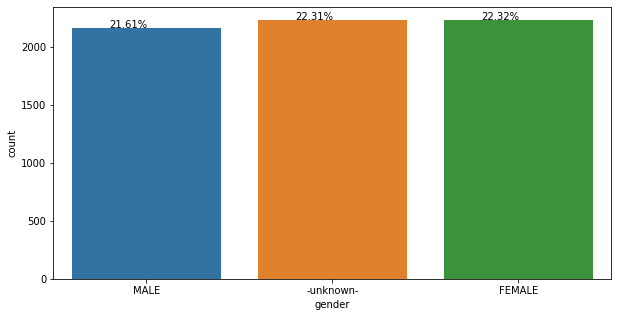

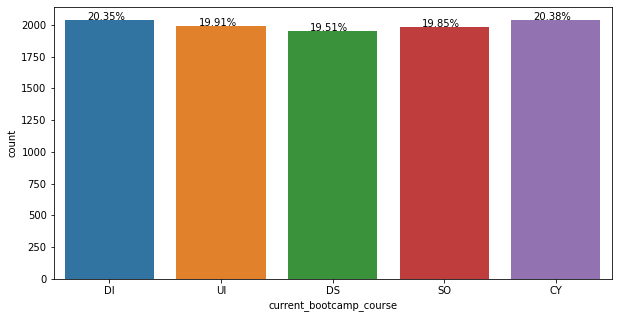

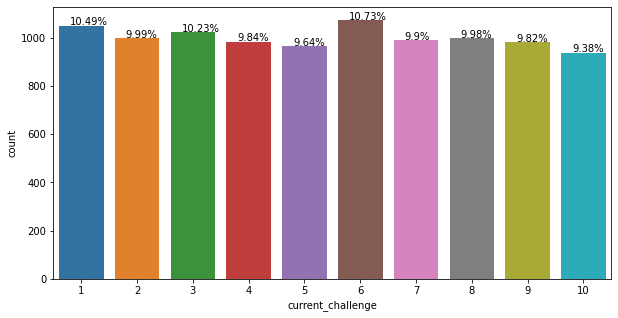

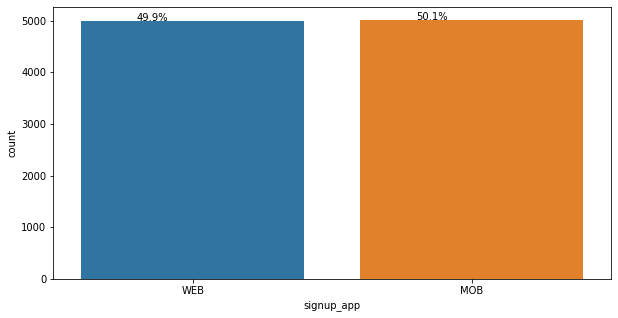

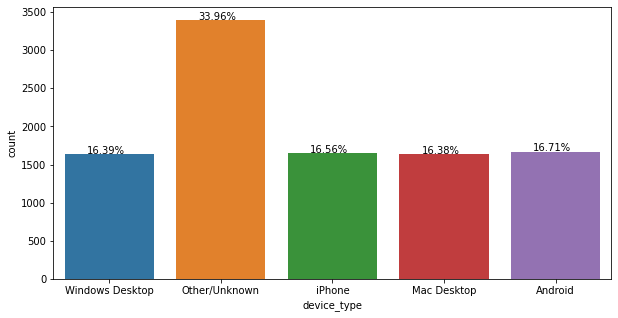

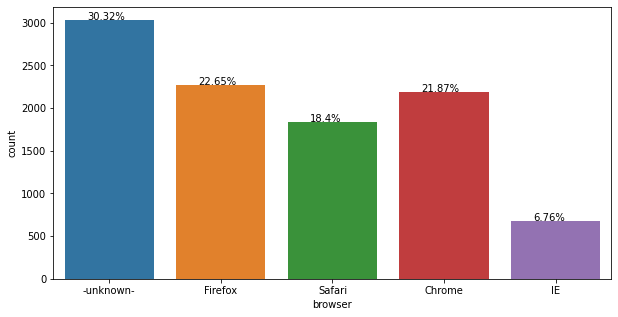

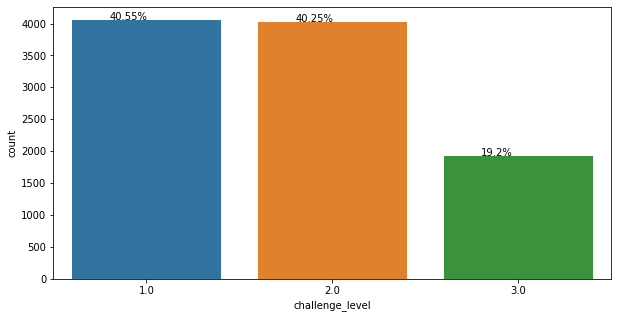

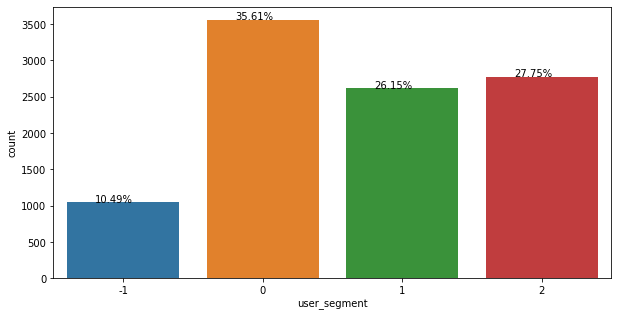

In [200]:
dfun_v1 = dfun[['gender', 'current_bootcamp_course','current_challenge', 'signup_app', 'device_type', 'browser',
               'challenge_level', 'user_segment']]

for col in dfun_v1.columns:
    
    plt.figure(figsize=(10,5))

    ax = sns.countplot(x=col, data=dfun_v1)
    for p in ax.patches:#displaying % as annotations
        ax.annotate(str(round(100*p.get_height()/len(dfun_v1),2))+"%", (p.get_x()+0.2, p.get_height()+2))


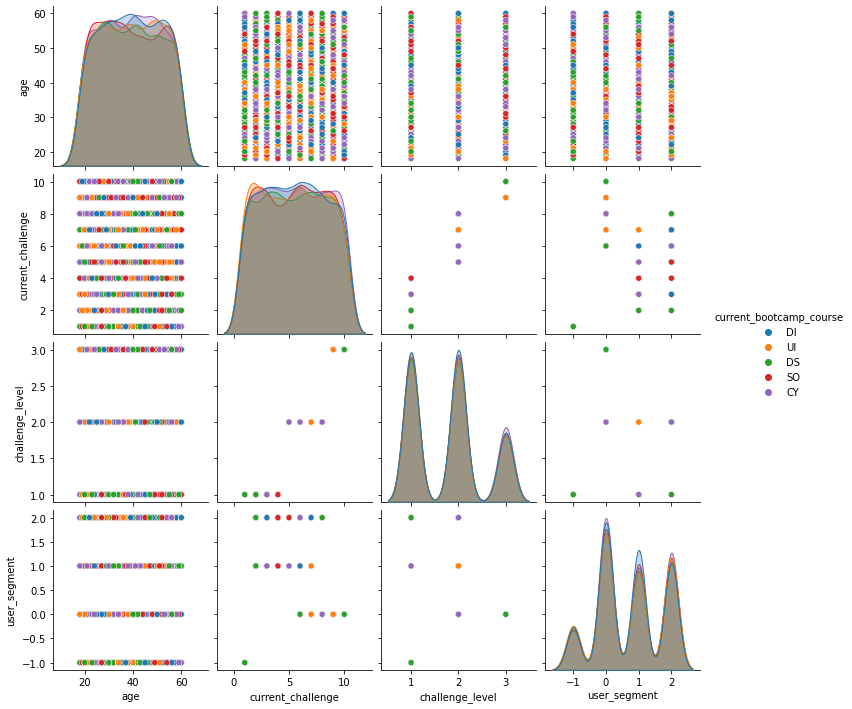

In [201]:
# pairplot with hue 'current_bootcamp_course'
sns.pairplot(dfun, hue ='current_bootcamp_course')

plt.show()

#### This is an artificially generated dataset and most of the distributions are assigned using NumPy random function. The distribution of almost all variables looks evenly distributed. 



#### Now that we have segmented users and challenges we get down to create, we carve a smaller dataframe to be able to calculate 

- the average time taken in completeing a challenge first for each course - challenge combination 

- segmentiwise average time taken to complete a challenge.

In [202]:
dfuN = dfun[['userid','current_bootcamp_course','current_challenge','tc1','tc2','tc3','tc4','tc5','tc6','tc7','tc8','tc9','tc10','user_segment']]
dfuN.reset_index(drop=True, inplace=True)
#dfuN.to_csv("small-dataframe-allusers.csv")
dfuN

,userid,current_bootcamp_course,current_challenge,tc1,tc2,tc3,tc4,tc5,tc6,tc7,tc8,tc9,tc10,user_segment
0,7d882b0dad,DI,7,120,2220,120,1470,720,120,inprogress,-1,-1,-1,2
1,a7a43297d4,UI,6,2370,1470,720,1470,120,inprogress,-1,-1,-1,-1,1
2,82f7537961,DI,7,2220,1470,120,2370,2520,1170,inprogress,-1,-1,-1,0
3,1b99f837c8,DI,10,1470,2670,2370,1620,720,2070,120,570,2520,inprogress,0
4,f5b482aba2,DI,6,2670,2820,1620,2370,1170,inprogress,-1,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0130587b9a,DS,10,2820,2520,2970,1020,2970,1170,1470,120,720,inprogress,0
9996,0031dc4022,DS,1,inprogress,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
9997,c494a012e9,DS,2,1170,inprogress,-1,-1,-1,-1,-1,-1,-1,-1,2
9998,0d1d0c760d,DS,3,1620,1470,inprogress,-1,-1,-1,-1,-1,-1,-1,1


#### The chunk of code below calculates a global average time across all users, representing average time of completion for a challenge belonging to a particular course.



In [203]:
# Loop to calculate average time taken in completing challenges

nlist = []
for i in range(len(dfuN)):
    cc = dfuN.loc[i]["current_bootcamp_course"]
    
    dfuNN = dfuN[dfuN['current_bootcamp_course'] == cc]
    
    c = dfuNN.loc[i]["current_challenge"]
    if c == 10:
        c = c-1
    u = dfuNN.loc[i]["user_segment"]
    tc = str('tc')+str(c)
    nT = pd.DataFrame(dfuNN[tc])
    indexNames = nT[nT[tc]== 'inprogress'].index
    nT.drop(index = indexNames,inplace = True, axis =0)
    indexNames = nT[nT[tc]== '-1'].index
    nT.drop(index = indexNames,inplace = True, axis =0)
    nT[tc] = nT[tc].astype (float)
    nt = nT[tc].mean()
    nlist.append(nt)
   

### We will do a similar execercise for creating lists of average time of completion of challenges, this time we will create three different averages user segmentwise, 
**this way we are able to create average time completion for a particular challenge belonging to a particular course-module combination for each segment of user.**

In [204]:
dfuN_0 = dfuN[dfuN.user_segment ==0]
dfuN_1 = dfuN[dfuN.user_segment ==1]
dfuN_2 = dfuN[dfuN.user_segment ==2]
dfuN_0.reset_index(drop=True, inplace=True)
dfuN_1.reset_index(drop=True, inplace=True)
dfuN_2.reset_index(drop=True, inplace=True)

dfuN_unclustered = dfuN[dfuN.user_segment ==-1]
dfuN_unclustered.reset_index(drop=True, inplace=True)
dfuN_unclustered

,userid,current_bootcamp_course,current_challenge,tc1,tc2,tc3,tc4,tc5,tc6,tc7,tc8,tc9,tc10,user_segment
0,b5a2afb503,DS,1,inprogress,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,dd90a36ef9,UI,1,inprogress,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,815311dfdd,CY,1,inprogress,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,71b0fbc4cd,DI,1,inprogress,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,c69938959b,SO,1,inprogress,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,08b0345f73,DS,1,inprogress,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1045,929f44cd1e,SO,1,inprogress,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1046,e7e5cb75d0,DI,1,inprogress,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1047,805fddf90e,SO,1,inprogress,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [205]:
nlist2 = []
for i in range(len(dfuN_0)):
    cc = dfuN_0.loc[i]["current_bootcamp_course"]
    
    dfuNN = dfuN_0[dfuN_0['current_bootcamp_course'] == cc]
    
    c = dfuNN.loc[i]["current_challenge"]
    if c == 10:
        c = c-1
    u = dfuNN.loc[i]["user_segment"]
    tc = str('tc')+str(c)
    nT = pd.DataFrame(dfuNN[tc])
    indexNames = nT[nT[tc]== 'inprogress'].index
    nT.drop(index = indexNames,inplace = True, axis =0)
    indexNames = nT[nT[tc]== '-1'].index
    nT.drop(index = indexNames,inplace = True, axis =0)
    nT[tc] = nT[tc].astype (float)
    nt = nT[tc].mean()
    nlist2.append(nt)
dfuN_0['NudgeT0'] = nlist2

nlist3 = []
for i in range(len(dfuN_1)):
    cc = dfuN_1.loc[i]["current_bootcamp_course"]
    
    dfuNN = dfuN_1[dfuN_1['current_bootcamp_course'] == cc]
    
    c = dfuNN.loc[i]["current_challenge"]
    if c == 10:
        c=c-1
    u = dfuN_1.loc[i]["user_segment"]
    tc = str('tc')+str(c)
    nT = pd.DataFrame(dfuNN[tc])
    indexNames = nT[nT[tc]== 'inprogress'].index
    nT.drop(index = indexNames,inplace = True, axis =0)
    indexNames = nT[nT[tc]== '-1'].index
    nT.drop(index = indexNames,inplace = True, axis =0)
    nT[tc] = nT[tc].astype (float)
    nt = nT[tc].mean()
    nlist3.append(nt)
dfuN_1['NudgeT1'] = nlist3

nlist4 = []
for i in range(len(dfuN_2)):
    cc = dfuN_2.loc[i]["current_bootcamp_course"]
    
    dfuNN = dfuN_2[dfuN_2['current_bootcamp_course'] == cc]
    
    c = dfuNN.loc[i]["current_challenge"]
    if c == 10:
        c=c-1
    u = dfuNN.loc[i]["user_segment"]
    tc = str('tc')+str(c)
    nT = pd.DataFrame(dfuNN[tc])
    indexNames = nT[nT[tc]== 'inprogress'].index
    nT.drop(index = indexNames,inplace = True, axis =0)
    indexNames = nT[nT[tc]== '-1'].index
    nT.drop(index = indexNames,inplace = True, axis =0)
    nT[tc] = nT[tc].astype (float)
    nt = nT[tc].mean()
    nlist4.append(nt)
dfuN_2['NudgeT2'] = nlist4

dfun['NudgeT0'] = dfun['userid'].map(dfuN_0.set_index('userid')['NudgeT0'])
dfun['NudgeT1'] = dfun['userid'].map(dfuN_1.set_index('userid')['NudgeT1'])
dfun['NudgeT2'] = dfun['userid'].map(dfuN_2.set_index('userid')['NudgeT2'])

dfun['NudgeO'] = nlist

dfunTT = dfun[['NudgeO','NudgeT0','NudgeT1','NudgeT2']]
dfunTT['NudgeS'] = ''

dfunTT['NudgeT0'] = dfunTT['NudgeT0'].astype (float)
dfunTT['NudgeT1'] = dfunTT['NudgeT1'].astype (float)
dfunTT['NudgeT2'] = dfunTT['NudgeT2'].astype (float)
dfunTT['NudgeT0']= dfunTT['NudgeT0'].replace(to_replace=np.nan, value=0)
dfunTT['NudgeT1']= dfunTT['NudgeT1'].replace(to_replace=np.nan, value=0)
dfunTT['NudgeT2']= dfunTT['NudgeT2'].replace(to_replace=np.nan, value=0)

dfunTT['NudgeS'] = dfunTT['NudgeT0']+ dfunTT['NudgeT1']+ dfunTT['NudgeT2']        

dfunTT['NudgeO'] = dfunTT['NudgeO'].astype (float)

for i in range(len(dfunTT)):
    if dfunTT.at[i,'NudgeS'] == 0:
        dfunTT.at[i,'NudgeS'] = dfunTT.at[i,'NudgeO']
#dfunTT.to_csv("all-average-nudge-scores.csv")
dfunTT  


,NudgeO,NudgeT0,NudgeT1,NudgeT2,NudgeS
0,1610.138408,0.000000,0.000000,1001.250000,1001.250000
1,1532.252964,0.000000,1566.774194,0.000000,1566.774194
2,1610.138408,1618.684211,0.000000,0.000000,1618.684211
3,1570.990099,1570.990099,0.000000,0.000000,1570.990099
4,1485.170670,0.000000,1602.352941,0.000000,1602.352941
...,...,...,...,...,...
9995,1562.774566,1562.774566,0.000000,0.000000,1562.774566
9996,1549.416859,0.000000,0.000000,0.000000,1549.416859
9997,1528.632863,0.000000,0.000000,1551.026786,1551.026786
9998,1534.681953,0.000000,1521.547988,0.000000,1521.547988


In [206]:
print(dfun.columns)
dfun

Index(['userid', 'date_account_created', 'date_first_enrollment', 'gender',
       'age', 'location', 'current_bootcamp_course', 'current_module',
       'current_challenge', 'tc1', 'tc2', 'tc3', 'tc4', 'tc5', 'tc6', 'tc7',
       'tc8', 'tc9', 'tc10', 'signup_app', 'device_type', 'browser',
       'challenge_level', 'user_segment', 'NudgeT0', 'NudgeT1', 'NudgeT2',
       'NudgeO'],
      dtype='object')


,userid,date_account_created,date_first_enrollment,gender,age,location,current_bootcamp_course,current_module,current_challenge,tc1,...,tc10,signup_app,device_type,browser,challenge_level,user_segment,NudgeT0,NudgeT1,NudgeT2,NudgeO
0,7d882b0dad,03-09-2015,NaN,NaN,24,India,DI,SMM,7,120,...,-1,WEB,Windows Desktop,-unknown-,2.0,2,NaN,NaN,1001.250000,1610.138408
1,a7a43297d4,27-10-2009,30-11-2014,NaN,51,Italy,UI,ThinkLikeaDesigner,6,2370,...,-1,WEB,Other/Unknown,Firefox,2.0,1,NaN,1566.774194,NaN,1532.252964
2,82f7537961,30-04-2011,19-04-2019,NaN,53,Japan,DI,E-Commerce,7,2220,...,-1,WEB,Windows Desktop,-unknown-,2.0,0,1618.684211,NaN,NaN,1610.138408
3,1b99f837c8,28-04-2008,07-02-2013,NaN,56,Germany,DI,MarketingFundamentals,10,1470,...,inprogress,MOB,iPhone,-unknown-,3.0,0,1570.990099,NaN,NaN,1570.990099
4,f5b482aba2,14-08-2016,NaN,MALE,21,Indonesia,DI,MarketingFundamentals,6,2670,...,-1,MOB,Other/Unknown,-unknown-,2.0,1,NaN,1602.352941,NaN,1485.170670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0130587b9a,14-10-2005,16-12-2015,MALE,40,France,DS,AppliedAI,10,2820,...,inprogress,MOB,Android,-unknown-,3.0,0,1562.774566,NaN,NaN,1562.774566
9996,0031dc4022,11-09-2007,NaN,NaN,30,Sweden,DS,PythonProgramming,1,inprogress,...,-1,MOB,iPhone,-unknown-,1.0,-1,NaN,NaN,NaN,1549.416859
9997,c494a012e9,24-09-2007,31-12-2001,MALE,47,Malaysia,DS,AppliedAI,2,1170,...,-1,WEB,Windows Desktop,-unknown-,1.0,2,NaN,NaN,1551.026786,1528.632863
9998,0d1d0c760d,24-04-2014,28-07-2013,MALE,32,Vietnam,DS,VisualCommunications,3,1620,...,-1,MOB,iPhone,Safari,1.0,1,NaN,1521.547988,NaN,1534.681953


In [207]:

cols = ['userid', 'date_account_created', 'date_first_enrollment', 'gender',
       'age', 'location', 'current_bootcamp_course', 'current_module',
       'current_challenge', 'tc1', 'tc2', 'tc3', 'tc4', 'tc5', 'tc6', 'tc7',
       'tc8', 'tc9', 'tc10', 'signup_app', 'device_type', 'browser',
       'challenge_level', 'user_segment', 'NudgeO']

dfun = dfun[cols]
dfun['NudgeS'] = dfunTT.NudgeS
dfun

,userid,date_account_created,date_first_enrollment,gender,age,location,current_bootcamp_course,current_module,current_challenge,tc1,...,tc8,tc9,tc10,signup_app,device_type,browser,challenge_level,user_segment,NudgeO,NudgeS
0,7d882b0dad,03-09-2015,NaN,NaN,24,India,DI,SMM,7,120,...,-1,-1,-1,WEB,Windows Desktop,-unknown-,2.0,2,1610.138408,1001.250000
1,a7a43297d4,27-10-2009,30-11-2014,NaN,51,Italy,UI,ThinkLikeaDesigner,6,2370,...,-1,-1,-1,WEB,Other/Unknown,Firefox,2.0,1,1532.252964,1566.774194
2,82f7537961,30-04-2011,19-04-2019,NaN,53,Japan,DI,E-Commerce,7,2220,...,-1,-1,-1,WEB,Windows Desktop,-unknown-,2.0,0,1610.138408,1618.684211
3,1b99f837c8,28-04-2008,07-02-2013,NaN,56,Germany,DI,MarketingFundamentals,10,1470,...,570,2520,inprogress,MOB,iPhone,-unknown-,3.0,0,1570.990099,1570.990099
4,f5b482aba2,14-08-2016,NaN,MALE,21,Indonesia,DI,MarketingFundamentals,6,2670,...,-1,-1,-1,MOB,Other/Unknown,-unknown-,2.0,1,1485.170670,1602.352941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0130587b9a,14-10-2005,16-12-2015,MALE,40,France,DS,AppliedAI,10,2820,...,120,720,inprogress,MOB,Android,-unknown-,3.0,0,1562.774566,1562.774566
9996,0031dc4022,11-09-2007,NaN,NaN,30,Sweden,DS,PythonProgramming,1,inprogress,...,-1,-1,-1,MOB,iPhone,-unknown-,1.0,-1,1549.416859,1549.416859
9997,c494a012e9,24-09-2007,31-12-2001,MALE,47,Malaysia,DS,AppliedAI,2,1170,...,-1,-1,-1,WEB,Windows Desktop,-unknown-,1.0,2,1528.632863,1551.026786
9998,0d1d0c760d,24-04-2014,28-07-2013,MALE,32,Vietnam,DS,VisualCommunications,3,1620,...,-1,-1,-1,MOB,iPhone,Safari,1.0,1,1534.681953,1521.547988


In [208]:
#Weighted average of the two averages with segment wise average having 75 % weightage
dfun['Nudgex'] = 0.75*dfun.NudgeS + 0.25*dfun.NudgeO 
dfun

,userid,date_account_created,date_first_enrollment,gender,age,location,current_bootcamp_course,current_module,current_challenge,tc1,...,tc9,tc10,signup_app,device_type,browser,challenge_level,user_segment,NudgeO,NudgeS,Nudgex
0,7d882b0dad,03-09-2015,NaN,NaN,24,India,DI,SMM,7,120,...,-1,-1,WEB,Windows Desktop,-unknown-,2.0,2,1610.138408,1001.250000,1153.472102
1,a7a43297d4,27-10-2009,30-11-2014,NaN,51,Italy,UI,ThinkLikeaDesigner,6,2370,...,-1,-1,WEB,Other/Unknown,Firefox,2.0,1,1532.252964,1566.774194,1558.143886
2,82f7537961,30-04-2011,19-04-2019,NaN,53,Japan,DI,E-Commerce,7,2220,...,-1,-1,WEB,Windows Desktop,-unknown-,2.0,0,1610.138408,1618.684211,1616.547760
3,1b99f837c8,28-04-2008,07-02-2013,NaN,56,Germany,DI,MarketingFundamentals,10,1470,...,2520,inprogress,MOB,iPhone,-unknown-,3.0,0,1570.990099,1570.990099,1570.990099
4,f5b482aba2,14-08-2016,NaN,MALE,21,Indonesia,DI,MarketingFundamentals,6,2670,...,-1,-1,MOB,Other/Unknown,-unknown-,2.0,1,1485.170670,1602.352941,1573.057373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0130587b9a,14-10-2005,16-12-2015,MALE,40,France,DS,AppliedAI,10,2820,...,720,inprogress,MOB,Android,-unknown-,3.0,0,1562.774566,1562.774566,1562.774566
9996,0031dc4022,11-09-2007,NaN,NaN,30,Sweden,DS,PythonProgramming,1,inprogress,...,-1,-1,MOB,iPhone,-unknown-,1.0,-1,1549.416859,1549.416859,1549.416859
9997,c494a012e9,24-09-2007,31-12-2001,MALE,47,Malaysia,DS,AppliedAI,2,1170,...,-1,-1,WEB,Windows Desktop,-unknown-,1.0,2,1528.632863,1551.026786,1545.428305
9998,0d1d0c760d,24-04-2014,28-07-2013,MALE,32,Vietnam,DS,VisualCommunications,3,1620,...,-1,-1,MOB,iPhone,Safari,1.0,1,1534.681953,1521.547988,1524.831479


In [209]:
dfun = dfun[['userid', 'date_account_created', 'date_first_enrollment', 'gender',
       'age', 'location', 'current_bootcamp_course', 'current_module',
       'current_challenge', 'tc1', 'tc2', 'tc3', 'tc4', 'tc5', 'tc6', 'tc7',
       'tc8', 'tc9', 'tc10', 'signup_app', 'device_type', 'browser',
       'challenge_level', 'user_segment', 'Nudgex']]
#dfun.to_csv("all-users-with-Nudgex.csv")
dfun

,userid,date_account_created,date_first_enrollment,gender,age,location,current_bootcamp_course,current_module,current_challenge,tc1,...,tc7,tc8,tc9,tc10,signup_app,device_type,browser,challenge_level,user_segment,Nudgex
0,7d882b0dad,03-09-2015,NaN,NaN,24,India,DI,SMM,7,120,...,inprogress,-1,-1,-1,WEB,Windows Desktop,-unknown-,2.0,2,1153.472102
1,a7a43297d4,27-10-2009,30-11-2014,NaN,51,Italy,UI,ThinkLikeaDesigner,6,2370,...,-1,-1,-1,-1,WEB,Other/Unknown,Firefox,2.0,1,1558.143886
2,82f7537961,30-04-2011,19-04-2019,NaN,53,Japan,DI,E-Commerce,7,2220,...,inprogress,-1,-1,-1,WEB,Windows Desktop,-unknown-,2.0,0,1616.547760
3,1b99f837c8,28-04-2008,07-02-2013,NaN,56,Germany,DI,MarketingFundamentals,10,1470,...,120,570,2520,inprogress,MOB,iPhone,-unknown-,3.0,0,1570.990099
4,f5b482aba2,14-08-2016,NaN,MALE,21,Indonesia,DI,MarketingFundamentals,6,2670,...,-1,-1,-1,-1,MOB,Other/Unknown,-unknown-,2.0,1,1573.057373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0130587b9a,14-10-2005,16-12-2015,MALE,40,France,DS,AppliedAI,10,2820,...,1470,120,720,inprogress,MOB,Android,-unknown-,3.0,0,1562.774566
9996,0031dc4022,11-09-2007,NaN,NaN,30,Sweden,DS,PythonProgramming,1,inprogress,...,-1,-1,-1,-1,MOB,iPhone,-unknown-,1.0,-1,1549.416859
9997,c494a012e9,24-09-2007,31-12-2001,MALE,47,Malaysia,DS,AppliedAI,2,1170,...,-1,-1,-1,-1,WEB,Windows Desktop,-unknown-,1.0,2,1545.428305
9998,0d1d0c760d,24-04-2014,28-07-2013,MALE,32,Vietnam,DS,VisualCommunications,3,1620,...,-1,-1,-1,-1,MOB,iPhone,Safari,1.0,1,1524.831479


In [210]:
dfs

,session_id,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,A133186A73DA481590EF4FE2F4020758,2b5014acb1,lookup,help_callback,wishlist,Android,120
1,B84B15C3224E4A7B9CEB4D09A1FCC75C,2b5014acb1,index,click,login_page,Android,2670
2,E9E8CF4B08C24FCF97ADAE9CD46CA1F4,2b5014acb1,show,data,p3,Android,2820
3,3B105048092F42F38F3792F1C35F1E2C,2b5014acb1,index,click,account_notification_settings,Android,1020
4,A785F5C682A1469793DADE7D19955D55,2b5014acb1,index,help_callback,wishlist_note,Android,2370
...,...,...,...,...,...,...,...
99995,E9F76810E9754D16B3E69BB095E159EA,c63dd1767d,similar_topics,data,message_inbox,iPhone,2970
99996,C68420BB930345B8861020A2B27E6A80,c63dd1767d,lookup,message_help,login,iPhone,270
99997,44F3164E0FBE4240B41E24AB143E3DDD,c63dd1767d,read_text,data,-unknown-,iPhone,2670
99998,C2BC8B315B564E66B442E3C8A8223E4A,c63dd1767d,index,click,user_friend_recommendations,iPhone,1470


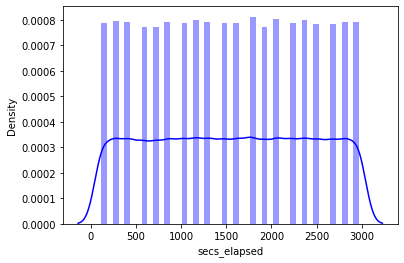

In [211]:


sns.distplot(dfs["secs_elapsed"],color='blue');

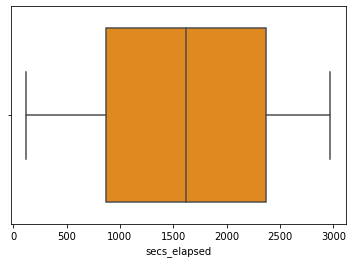

In [212]:
sns.boxplot(dfs["secs_elapsed"],color='darkorange');

### The transactional data table, which basically captures all sessions by multiple users has total of 100000 entries , this table has multiple sessions from multiple users and if we pick the last entry for any user in this table, that will correspond to the current session of that user.

**We will need to group this table by userid and pick the last entry from the groupped table for our model building purpose.**

In [213]:
dfs["action_detail"]=dfs["action_detail"].replace(to_replace=np.nan, value='Unknown')
dfs["action_type"]=dfs["action_type"].replace(to_replace=np.nan, value='Notknown')

In [214]:
dfs["action_detail"].value_counts()

p4                               2825
-unknown-                        2820
contact_host                     2819
account_notification_settings    2802
message_to_host_change           2758
p1                               2749
message_post                     2744
oauth_response                   2742
update_user                      2739
update_listing_description       2738
wishlist_note                    2730
view_search_results              2720
user_friend_recommendations      2719
message_inbox                    2716
wishlist                         2716
message_to_host_focus            2714
update_listing                   2712
message_thread                   2709
view_listing                     2709
oauth_login                      2701
login_page                       2698
wishlist_content_update          2697
user_profile_content_update      2695
user_wishlists                   2695
login_modal                      2686
toggle_starred_thread            2680
manage_listi

In [215]:
dfs["action_type"].value_counts()

submit_answer    14392
data             14385
click            14336
-unknown-        14332
help_callback    14205
view             14185
message_help     14165
Name: action_type, dtype: int64

In [216]:
#groupby and pick last entry for current session
dfss =  (dfs
            .groupby('user_id')
            .tail(1))
#dfss.to_csv("current-session-for-all-users.csv")
dfss

,session_id,user_id,action,action_type,action_detail,device_type,secs_elapsed
9,C2ED031758E34DD5B4BF720C78FB65D4,2b5014acb1,show,-unknown-,view_listing,Android,1620
19,D4B6FB996ED649E2B6C6ED3C6FA491C2,77e98852b5,index,help_callback,account_notification_settings,Mac Desktop,1620
29,4B45D383B36B412DADD64988EFC3C252,bea83d8b93,read_text,submit_answer,message_thread,Other/Unknown,1170
39,436B5F55CB4C47C5AAA2A26DA14C03AB,c12f3433d2,index,message_help,message_to_host_change,Other/Unknown,2370
49,E3E7C036D91F47E5AF1788C54F773DEE,9392aeb546,similar_topics,data,message_to_host_change,Windows Desktop,2220
...,...,...,...,...,...,...,...
99959,5FCA2688B66943408E9C12EDF95BD570,49603d40a4,lookup,click,wishlist_note,Windows Desktop,2520
99969,90F66756BF364B1D8EBCFD4B207C92A1,d32f13528a,personalize,-unknown-,login_page,Windows Desktop,2220
99979,A81BB8F61C494DC0B00625398DC75B04,9d3f3659b2,similar_topics,data,p4,Mac Desktop,420
99989,782048B8CF8D42D0BD6D158184007149,26187f36b8,personalize,help_callback,account_notification_settings,Mac Desktop,1170


In [217]:
dfs.isnull().sum()

session_id       0
user_id          0
action           0
action_type      0
action_detail    0
device_type      0
secs_elapsed     0
dtype: int64

In [218]:
secs = dfs['secs_elapsed'] 

In [219]:
dfss = dfs.groupby("user_id", as_index= False).agg(lambda x:x.tolist())
#dfss.to_csv("aggregated-all-sessions-grouped-byuserid.csv")
dfss

,user_id,session_id,action,action_type,action_detail,device_type,secs_elapsed
0,000e896670,"[8B3FA74329094C1B9EA7178628B7D581, FB9FB1C8996...","[show, read_text, similar_topics, lookup, simi...","[click, -unknown-, submit_answer, data, help_c...","[toggle_starred_thread, manage_listing, notifi...","[Other/Unknown, Other/Unknown, Other/Unknown, ...","[1020, 1770, 2970, 2220, 2520, 1320, 1320, 192..."
1,0012a78417,"[291936B680E34E5F8558D5C996EEDAF1, CA62D89ACCD...","[index, read_text, search_results, search_resu...","[click, click, help_callback, message_help, da...","[notifications, login, login_page, notificatio...","[Other/Unknown, Other/Unknown, Other/Unknown, ...","[120, 570, 1020, 1170, 570, 720, 570, 1020, 87..."
2,001f1b647d,"[E5830AEF137B45F09E0EF7DC1B65E556, 945BBB77965...","[search_results, personalize, index, similar_t...","[data, -unknown-, click, data, data, data, hel...","[account_notification_settings, view_listing, ...","[Mac Desktop, Mac Desktop, Mac Desktop, Mac De...","[1470, 1620, 1770, 2220, 870, 1470, 1920, 2220..."
3,0022ba00f1,"[EAF7427AA3AC4EF2B800C9EAE31F6AB4, 8980C7AFD30...","[show, read_text, similar_topics, personalize,...","[message_help, view, message_help, submit_answ...","[toggle_starred_thread, wishlist_note, login_p...","[Other/Unknown, Other/Unknown, Other/Unknown, ...","[2070, 2670, 1920, 2370, 1470, 1620, 1470, 267..."
4,0031dc4022,"[9C455EF5BC3E4501AE4638674EDEFB09, CB6BDFFC2E4...","[similar_topics, similar_topics, show, show, s...","[help_callback, view, data, message_help, mess...","[manage_listing, view_listing, login, update_l...","[iPhone, iPhone, iPhone, iPhone, iPhone, iPhon...","[120, 2670, 1920, 2370, 270, 1320, 1470, 1470,..."
...,...,...,...,...,...,...,...
9995,ffde2e9fc8,"[3D78D944F4924545B82C7A4A249513E2, 5BB5B4BC1DE...","[index, personalize, index, index, index, sear...","[message_help, view, -unknown-, data, data, vi...","[user_languages, -unknown-, contact_host, p4, ...","[Mac Desktop, Mac Desktop, Mac Desktop, Mac De...","[570, 1920, 2520, 1020, 1320, 2370, 2520, 1620..."
9996,ffe1b77392,"[2D29B3609CFF49D6A397FA0CC98414DD, 46F23F9BF46...","[search_results, index, personalize, similar_t...","[submit_answer, data, data, click, view, data,...","[user_listings, lookup_message_thread, terms_a...","[Other/Unknown, Other/Unknown, Other/Unknown, ...","[720, 2220, 2670, 2070, 1470, 2820, 2970, 2670..."
9997,fffafea982,"[D9CF01549971406E9D6097E94DF572AB, BDB0AE52A42...","[search_results, index, lookup, index, search_...","[help_callback, -unknown-, message_help, data,...","[lookup_message_thread, lookup_message_thread,...","[Other/Unknown, Other/Unknown, Other/Unknown, ...","[1770, 2070, 420, 1170, 270, 2070, 2520, 1470,..."
9998,fffd96b0e7,"[8538AD9CE8184824B4A720EB6081BD28, 48CDAE4BFED...","[similar_topics, similar_topics, read_text, se...","[message_help, click, data, submit_answer, mes...","[terms_and_privacy, user_profile_content_updat...","[Android, Android, Android, Android, Android, ...","[2220, 120, 2370, 420, 1920, 2820, 2970, 1170,..."


In [220]:
dfss['secs_elapsed'] = secs
dfss

,user_id,session_id,action,action_type,action_detail,device_type,secs_elapsed
0,000e896670,"[8B3FA74329094C1B9EA7178628B7D581, FB9FB1C8996...","[show, read_text, similar_topics, lookup, simi...","[click, -unknown-, submit_answer, data, help_c...","[toggle_starred_thread, manage_listing, notifi...","[Other/Unknown, Other/Unknown, Other/Unknown, ...",120
1,0012a78417,"[291936B680E34E5F8558D5C996EEDAF1, CA62D89ACCD...","[index, read_text, search_results, search_resu...","[click, click, help_callback, message_help, da...","[notifications, login, login_page, notificatio...","[Other/Unknown, Other/Unknown, Other/Unknown, ...",2670
2,001f1b647d,"[E5830AEF137B45F09E0EF7DC1B65E556, 945BBB77965...","[search_results, personalize, index, similar_t...","[data, -unknown-, click, data, data, data, hel...","[account_notification_settings, view_listing, ...","[Mac Desktop, Mac Desktop, Mac Desktop, Mac De...",2820
3,0022ba00f1,"[EAF7427AA3AC4EF2B800C9EAE31F6AB4, 8980C7AFD30...","[show, read_text, similar_topics, personalize,...","[message_help, view, message_help, submit_answ...","[toggle_starred_thread, wishlist_note, login_p...","[Other/Unknown, Other/Unknown, Other/Unknown, ...",1020
4,0031dc4022,"[9C455EF5BC3E4501AE4638674EDEFB09, CB6BDFFC2E4...","[similar_topics, similar_topics, show, show, s...","[help_callback, view, data, message_help, mess...","[manage_listing, view_listing, login, update_l...","[iPhone, iPhone, iPhone, iPhone, iPhone, iPhon...",2370
...,...,...,...,...,...,...,...
9995,ffde2e9fc8,"[3D78D944F4924545B82C7A4A249513E2, 5BB5B4BC1DE...","[index, personalize, index, index, index, sear...","[message_help, view, -unknown-, data, data, vi...","[user_languages, -unknown-, contact_host, p4, ...","[Mac Desktop, Mac Desktop, Mac Desktop, Mac De...",2970
9996,ffe1b77392,"[2D29B3609CFF49D6A397FA0CC98414DD, 46F23F9BF46...","[search_results, index, personalize, similar_t...","[submit_answer, data, data, click, view, data,...","[user_listings, lookup_message_thread, terms_a...","[Other/Unknown, Other/Unknown, Other/Unknown, ...",2670
9997,fffafea982,"[D9CF01549971406E9D6097E94DF572AB, BDB0AE52A42...","[search_results, index, lookup, index, search_...","[help_callback, -unknown-, message_help, data,...","[lookup_message_thread, lookup_message_thread,...","[Other/Unknown, Other/Unknown, Other/Unknown, ...",1020
9998,fffd96b0e7,"[8538AD9CE8184824B4A720EB6081BD28, 48CDAE4BFED...","[similar_topics, similar_topics, read_text, se...","[message_help, click, data, submit_answer, mes...","[terms_and_privacy, user_profile_content_updat...","[Android, Android, Android, Android, Android, ...",2670


#### By aggregating the sessions into a list captured in each column of the dataframe we have captured the users behaiviour interms of his actions on the website. We will use this data for recommendation later on.

In [221]:
import re
def convert_to_string(action):
    action = [str(i) for i in action]
    action = [re.sub("nan","",i) for i in action]
    action = ",".join(action)
    
    return action

In [222]:
dfss["action"] = dfss["action"].apply(convert_to_string)
dfss["action_type"] = dfss["action_type"].apply(convert_to_string)
dfss["action_detail"] = dfss["action_detail"].apply(convert_to_string)

In [223]:
def convert_to_set(device):
    device = [str(i) for i in device]
    device = [re.sub("nan","",i) for i in device]
    device = ",".join(set(device))
    
    return device

In [224]:
dfss['device_type'] =dfss['device_type'].apply(convert_to_set)

In [225]:
dfss.head()

,user_id,session_id,action,action_type,action_detail,device_type,secs_elapsed
0,000e896670,"[8B3FA74329094C1B9EA7178628B7D581, FB9FB1C8996...","show,read_text,similar_topics,lookup,similar_t...","click,-unknown-,submit_answer,data,help_callba...","toggle_starred_thread,manage_listing,notificat...",Other/Unknown,120
1,0012a78417,"[291936B680E34E5F8558D5C996EEDAF1, CA62D89ACCD...","index,read_text,search_results,search_results,...","click,click,help_callback,message_help,data,su...","notifications,login,login_page,notifications,t...",Other/Unknown,2670
2,001f1b647d,"[E5830AEF137B45F09E0EF7DC1B65E556, 945BBB77965...","search_results,personalize,index,similar_topic...","data,-unknown-,click,data,data,data,help_callb...","account_notification_settings,view_listing,upd...",Mac Desktop,2820
3,0022ba00f1,"[EAF7427AA3AC4EF2B800C9EAE31F6AB4, 8980C7AFD30...","show,read_text,similar_topics,personalize,pers...","message_help,view,message_help,submit_answer,v...","toggle_starred_thread,wishlist_note,login_page...",Other/Unknown,1020
4,0031dc4022,"[9C455EF5BC3E4501AE4638674EDEFB09, CB6BDFFC2E4...","similar_topics,similar_topics,show,show,show,r...","help_callback,view,data,message_help,message_h...","manage_listing,view_listing,login,update_listi...",iPhone,2370


In [226]:
train_df = dfun.loc[0:8999]
test_df = dfun.loc[9000:]
test_df

,userid,date_account_created,date_first_enrollment,gender,age,location,current_bootcamp_course,current_module,current_challenge,tc1,...,tc7,tc8,tc9,tc10,signup_app,device_type,browser,challenge_level,user_segment,Nudgex
9000,b880b7121f,13-08-2013,23-05-2004,MALE,27,China,DS,DataStorytelling,5,420,...,-1,-1,-1,-1,MOB,Other/Unknown,Firefox,2.0,2,1530.410709
9001,68d831ec4a,16-02-2001,03-11-2010,-unknown-,46,Canada,DI,SMM,7,570,...,inprogress,-1,-1,-1,WEB,Other/Unknown,Firefox,2.0,2,1153.472102
9002,45e7f04c61,30-06-2009,22-08-2018,NaN,50,Australia,SO,Python,1,inprogress,...,-1,-1,-1,-1,WEB,Other/Unknown,Firefox,1.0,-1,1561.059417
9003,d8bc434d6e,24-01-2016,09-01-2011,-unknown-,22,Japan,CY,CyberInfra&Tech,4,420,...,-1,-1,-1,-1,MOB,Android,Chrome,1.0,2,1512.488037
9004,a478cfabff,31-10-2013,18-04-2000,NaN,24,India,DI,E-Commerce,5,120,...,-1,-1,-1,-1,WEB,Mac Desktop,Chrome,2.0,2,1538.276063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0130587b9a,14-10-2005,16-12-2015,MALE,40,France,DS,AppliedAI,10,2820,...,1470,120,720,inprogress,MOB,Android,-unknown-,3.0,0,1562.774566
9996,0031dc4022,11-09-2007,NaN,NaN,30,Sweden,DS,PythonProgramming,1,inprogress,...,-1,-1,-1,-1,MOB,iPhone,-unknown-,1.0,-1,1549.416859
9997,c494a012e9,24-09-2007,31-12-2001,MALE,47,Malaysia,DS,AppliedAI,2,1170,...,-1,-1,-1,-1,WEB,Windows Desktop,-unknown-,1.0,2,1545.428305
9998,0d1d0c760d,24-04-2014,28-07-2013,MALE,32,Vietnam,DS,VisualCommunications,3,1620,...,-1,-1,-1,-1,MOB,iPhone,Safari,1.0,1,1524.831479


### We have to split our data for training, validation and testing our model. train_df has train and validation data in it. test_df has final test data in it.

In [227]:
train_merge = train_df.merge(dfss, left_on='userid', right_on='user_id', how='left')


In [228]:
print("Train  :",train_df.shape)

print("Session:",dfs.shape)

print("Merge  :",train_merge.shape)

print("No of users in Train Data with session info:",train_merge.shape[0])

print("{} / {} = {}".format(train_merge.shape[0],train_df.shape[0],np.round((train_merge.shape[0]/train_df.shape[0]),2)))

Train  : (9000, 25)
Session: (100000, 7)
Merge  : (9000, 32)
No of users in Train Data with session info: 9000
9000 / 9000 = 1.0


In [229]:
train_merge

,userid,date_account_created,date_first_enrollment,gender,age,location,current_bootcamp_course,current_module,current_challenge,tc1,...,challenge_level,user_segment,Nudgex,user_id,session_id,action,action_type,action_detail,device_type_y,secs_elapsed
0,7d882b0dad,03-09-2015,NaN,NaN,24,India,DI,SMM,7,120,...,2.0,2,1153.472102,7d882b0dad,"[81F715293B664D40885A07ACF773E0D8, 7136B291571...","read_text,read_text,personalize,search_results...","view,submit_answer,help_callback,help_callback...","message_thread,p1,user_profile_content_update,...",Windows Desktop,2220.0
1,a7a43297d4,27-10-2009,30-11-2014,NaN,51,Italy,UI,ThinkLikeaDesigner,6,2370,...,2.0,1,1558.143886,a7a43297d4,"[DB4ACE2E8E4D4BEFA9F1D47B01DBB821, CD3505D9C2F...","search_results,index,index,lookup,personalize,...","help_callback,-unknown-,help_callback,help_cal...","manage_listing,user_profile_content_update,use...",Other/Unknown,270.0
2,82f7537961,30-04-2011,19-04-2019,NaN,53,Japan,DI,E-Commerce,7,2220,...,2.0,0,1616.547760,82f7537961,"[40E1A7EA670D443B9EAF5C6AA7B6D0E8, C528DC1E42D...","similar_topics,index,personalize,read_text,ind...","click,-unknown-,data,-unknown-,submit_answer,s...","wishlist_content_update,message_post,account_n...",Windows Desktop,2520.0
3,1b99f837c8,28-04-2008,07-02-2013,NaN,56,Germany,DI,MarketingFundamentals,10,1470,...,3.0,0,1570.990099,1b99f837c8,"[37DEF3A671284E7F9C91B07DCDE0F907, C477B091470...","show,personalize,index,show,read_text,index,sh...","view,click,submit_answer,click,-unknown-,data,...","user_wishlists,update_user_profile,user_listin...",iPhone,1170.0
4,f5b482aba2,14-08-2016,NaN,MALE,21,Indonesia,DI,MarketingFundamentals,6,2670,...,2.0,1,1573.057373,f5b482aba2,"[DFA0D1AF6D204E1A9E8454051DD8DEBA, 0AC980BE1C2...","search_results,read_text,similar_topics,index,...","data,data,-unknown-,help_callback,click,click,...","message_to_host_focus,toggle_archived_thread,m...",Other/Unknown,720.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,00b12a3620,24-10-2007,07-07-2013,MALE,53,Singapore,DS,PythonProgramming,9,2970,...,3.0,0,1562.774566,00b12a3620,"[7591484E42714BE583B4B313649B6DAA, 53487FBAFE2...","index,index,show,index,similar_topics,read_tex...","help_callback,message_help,submit_answer,help_...","-unknown-,user_profile_content_update,wishlist...",Mac Desktop,270.0
8996,bf7ab6c968,07-08-2006,15-01-2002,NaN,20,Malaysia,CY,PythonforSecurity,8,1620,...,2.0,0,1569.401914,bf7ab6c968,"[08F85C0034544EE399B500648AEAF790, 9DB551E18B5...","show,lookup,lookup,search_results,lookup,looku...","help_callback,data,view,help_callback,view,cli...","message_to_host_change,update_listing_descript...",Mac Desktop,1320.0
8997,48ee2fd5a3,24-06-2012,14-04-2009,FEMALE,38,USA,SO,SQL&DataModeling,2,2670,...,1.0,1,1476.510625,48ee2fd5a3,"[C2BB2CE81EEF424595B00E65AFE36F17, 1C16930E4B3...","read_text,personalize,show,similar_topics,pers...","submit_answer,help_callback,data,click,message...","toggle_starred_thread,view_listing,message_to_...",Android,1020.0
8998,43641c1ae5,10-10-2003,18-04-2007,-unknown-,53,Japan,DI,SMM,1,inprogress,...,1.0,-1,1587.751641,43641c1ae5,"[B001E18CF24C42D8A88C46C6A92FE82C, 6C97D1A6571...","similar_topics,lookup,search_results,similar_t...","submit_answer,-unknown-,message_help,click,vie...","contact_host,update_listing,lookup_message_thr...",Other/Unknown,2670.0


**We now use our variable Nudgex which represents a weighted average time to complete the challenge by a particular user segment as a threshold to code NudgeX, which is a binary variable with 0 and 1 as possible values. The moment the second elapsed becomes equal to the threshold variable NudgeX is coded 1 , else it's 0**

In [230]:
nlist5 = []
for i in range(len(train_merge)):
    
    if train_merge.loc[i]['secs_elapsed'] >= train_merge.loc[i]['Nudgex']:
        
        nlist5.append(1)     
    else:
        nlist5.append(0)
train_merge['NudgeX'] = nlist5
train_merge = train_merge.drop('Nudgex',axis=1)
train_merge = train_merge.drop('user_id',axis=1)
train_merge

,userid,date_account_created,date_first_enrollment,gender,age,location,current_bootcamp_course,current_module,current_challenge,tc1,...,browser,challenge_level,user_segment,session_id,action,action_type,action_detail,device_type_y,secs_elapsed,NudgeX
0,7d882b0dad,03-09-2015,NaN,NaN,24,India,DI,SMM,7,120,...,-unknown-,2.0,2,"[81F715293B664D40885A07ACF773E0D8, 7136B291571...","read_text,read_text,personalize,search_results...","view,submit_answer,help_callback,help_callback...","message_thread,p1,user_profile_content_update,...",Windows Desktop,2220.0,1
1,a7a43297d4,27-10-2009,30-11-2014,NaN,51,Italy,UI,ThinkLikeaDesigner,6,2370,...,Firefox,2.0,1,"[DB4ACE2E8E4D4BEFA9F1D47B01DBB821, CD3505D9C2F...","search_results,index,index,lookup,personalize,...","help_callback,-unknown-,help_callback,help_cal...","manage_listing,user_profile_content_update,use...",Other/Unknown,270.0,0
2,82f7537961,30-04-2011,19-04-2019,NaN,53,Japan,DI,E-Commerce,7,2220,...,-unknown-,2.0,0,"[40E1A7EA670D443B9EAF5C6AA7B6D0E8, C528DC1E42D...","similar_topics,index,personalize,read_text,ind...","click,-unknown-,data,-unknown-,submit_answer,s...","wishlist_content_update,message_post,account_n...",Windows Desktop,2520.0,1
3,1b99f837c8,28-04-2008,07-02-2013,NaN,56,Germany,DI,MarketingFundamentals,10,1470,...,-unknown-,3.0,0,"[37DEF3A671284E7F9C91B07DCDE0F907, C477B091470...","show,personalize,index,show,read_text,index,sh...","view,click,submit_answer,click,-unknown-,data,...","user_wishlists,update_user_profile,user_listin...",iPhone,1170.0,0
4,f5b482aba2,14-08-2016,NaN,MALE,21,Indonesia,DI,MarketingFundamentals,6,2670,...,-unknown-,2.0,1,"[DFA0D1AF6D204E1A9E8454051DD8DEBA, 0AC980BE1C2...","search_results,read_text,similar_topics,index,...","data,data,-unknown-,help_callback,click,click,...","message_to_host_focus,toggle_archived_thread,m...",Other/Unknown,720.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,00b12a3620,24-10-2007,07-07-2013,MALE,53,Singapore,DS,PythonProgramming,9,2970,...,-unknown-,3.0,0,"[7591484E42714BE583B4B313649B6DAA, 53487FBAFE2...","index,index,show,index,similar_topics,read_tex...","help_callback,message_help,submit_answer,help_...","-unknown-,user_profile_content_update,wishlist...",Mac Desktop,270.0,0
8996,bf7ab6c968,07-08-2006,15-01-2002,NaN,20,Malaysia,CY,PythonforSecurity,8,1620,...,Firefox,2.0,0,"[08F85C0034544EE399B500648AEAF790, 9DB551E18B5...","show,lookup,lookup,search_results,lookup,looku...","help_callback,data,view,help_callback,view,cli...","message_to_host_change,update_listing_descript...",Mac Desktop,1320.0,0
8997,48ee2fd5a3,24-06-2012,14-04-2009,FEMALE,38,USA,SO,SQL&DataModeling,2,2670,...,-unknown-,1.0,1,"[C2BB2CE81EEF424595B00E65AFE36F17, 1C16930E4B3...","read_text,personalize,show,similar_topics,pers...","submit_answer,help_callback,data,click,message...","toggle_starred_thread,view_listing,message_to_...",Android,1020.0,0
8998,43641c1ae5,10-10-2003,18-04-2007,-unknown-,53,Japan,DI,SMM,1,inprogress,...,-unknown-,1.0,-1,"[B001E18CF24C42D8A88C46C6A92FE82C, 6C97D1A6571...","similar_topics,lookup,search_results,similar_t...","submit_answer,-unknown-,message_help,click,vie...","contact_host,update_listing,lookup_message_thr...",Other/Unknown,2670.0,1


In [231]:
test_df

,userid,date_account_created,date_first_enrollment,gender,age,location,current_bootcamp_course,current_module,current_challenge,tc1,...,tc7,tc8,tc9,tc10,signup_app,device_type,browser,challenge_level,user_segment,Nudgex
9000,b880b7121f,13-08-2013,23-05-2004,MALE,27,China,DS,DataStorytelling,5,420,...,-1,-1,-1,-1,MOB,Other/Unknown,Firefox,2.0,2,1530.410709
9001,68d831ec4a,16-02-2001,03-11-2010,-unknown-,46,Canada,DI,SMM,7,570,...,inprogress,-1,-1,-1,WEB,Other/Unknown,Firefox,2.0,2,1153.472102
9002,45e7f04c61,30-06-2009,22-08-2018,NaN,50,Australia,SO,Python,1,inprogress,...,-1,-1,-1,-1,WEB,Other/Unknown,Firefox,1.0,-1,1561.059417
9003,d8bc434d6e,24-01-2016,09-01-2011,-unknown-,22,Japan,CY,CyberInfra&Tech,4,420,...,-1,-1,-1,-1,MOB,Android,Chrome,1.0,2,1512.488037
9004,a478cfabff,31-10-2013,18-04-2000,NaN,24,India,DI,E-Commerce,5,120,...,-1,-1,-1,-1,WEB,Mac Desktop,Chrome,2.0,2,1538.276063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0130587b9a,14-10-2005,16-12-2015,MALE,40,France,DS,AppliedAI,10,2820,...,1470,120,720,inprogress,MOB,Android,-unknown-,3.0,0,1562.774566
9996,0031dc4022,11-09-2007,NaN,NaN,30,Sweden,DS,PythonProgramming,1,inprogress,...,-1,-1,-1,-1,MOB,iPhone,-unknown-,1.0,-1,1549.416859
9997,c494a012e9,24-09-2007,31-12-2001,MALE,47,Malaysia,DS,AppliedAI,2,1170,...,-1,-1,-1,-1,WEB,Windows Desktop,-unknown-,1.0,2,1545.428305
9998,0d1d0c760d,24-04-2014,28-07-2013,MALE,32,Vietnam,DS,VisualCommunications,3,1620,...,-1,-1,-1,-1,MOB,iPhone,Safari,1.0,1,1524.831479


In [232]:
test_merge = test_df.merge(dfss, left_on='userid', right_on='user_id', how='left')


In [233]:
test_merge.columns

Index(['userid', 'date_account_created', 'date_first_enrollment', 'gender',
       'age', 'location', 'current_bootcamp_course', 'current_module',
       'current_challenge', 'tc1', 'tc2', 'tc3', 'tc4', 'tc5', 'tc6', 'tc7',
       'tc8', 'tc9', 'tc10', 'signup_app', 'device_type_x', 'browser',
       'challenge_level', 'user_segment', 'Nudgex', 'user_id', 'session_id',
       'action', 'action_type', 'action_detail', 'device_type_y',
       'secs_elapsed'],
      dtype='object')

In [234]:
print("test:", test_df.shape)
print("sessions_df:", dfs.shape)
print("test_merge:", test_merge.shape)
print("{} / {} = {}".format(test_merge.shape[0],test_df.shape[0],np.round((test_merge.shape[0]/test_df.shape[0]),2)))

test: (1000, 25)
sessions_df: (100000, 7)
test_merge: (1000, 32)
1000 / 1000 = 1.0


In [235]:
#Checking null values
test_merge.isnull().sum()

userid                       0
date_account_created         0
date_first_enrollment      323
gender                     354
age                          0
location                     0
current_bootcamp_course      0
current_module               0
current_challenge            0
tc1                          0
tc2                          0
tc3                          0
tc4                          0
tc5                          0
tc6                          0
tc7                          0
tc8                          0
tc9                          0
tc10                         0
signup_app                   0
device_type_x                0
browser                      0
challenge_level              0
user_segment                 0
Nudgex                       0
user_id                      3
session_id                   3
action                       3
action_type                  3
action_detail                3
device_type_y                3
secs_elapsed                 3
dtype: i

In [236]:
all_cols = list(train_merge.columns)

In [237]:
train_merge = train_merge.rename(columns={"device_type_x":"device_type"})
train_merge

,userid,date_account_created,date_first_enrollment,gender,age,location,current_bootcamp_course,current_module,current_challenge,tc1,...,browser,challenge_level,user_segment,session_id,action,action_type,action_detail,device_type_y,secs_elapsed,NudgeX
0,7d882b0dad,03-09-2015,NaN,NaN,24,India,DI,SMM,7,120,...,-unknown-,2.0,2,"[81F715293B664D40885A07ACF773E0D8, 7136B291571...","read_text,read_text,personalize,search_results...","view,submit_answer,help_callback,help_callback...","message_thread,p1,user_profile_content_update,...",Windows Desktop,2220.0,1
1,a7a43297d4,27-10-2009,30-11-2014,NaN,51,Italy,UI,ThinkLikeaDesigner,6,2370,...,Firefox,2.0,1,"[DB4ACE2E8E4D4BEFA9F1D47B01DBB821, CD3505D9C2F...","search_results,index,index,lookup,personalize,...","help_callback,-unknown-,help_callback,help_cal...","manage_listing,user_profile_content_update,use...",Other/Unknown,270.0,0
2,82f7537961,30-04-2011,19-04-2019,NaN,53,Japan,DI,E-Commerce,7,2220,...,-unknown-,2.0,0,"[40E1A7EA670D443B9EAF5C6AA7B6D0E8, C528DC1E42D...","similar_topics,index,personalize,read_text,ind...","click,-unknown-,data,-unknown-,submit_answer,s...","wishlist_content_update,message_post,account_n...",Windows Desktop,2520.0,1
3,1b99f837c8,28-04-2008,07-02-2013,NaN,56,Germany,DI,MarketingFundamentals,10,1470,...,-unknown-,3.0,0,"[37DEF3A671284E7F9C91B07DCDE0F907, C477B091470...","show,personalize,index,show,read_text,index,sh...","view,click,submit_answer,click,-unknown-,data,...","user_wishlists,update_user_profile,user_listin...",iPhone,1170.0,0
4,f5b482aba2,14-08-2016,NaN,MALE,21,Indonesia,DI,MarketingFundamentals,6,2670,...,-unknown-,2.0,1,"[DFA0D1AF6D204E1A9E8454051DD8DEBA, 0AC980BE1C2...","search_results,read_text,similar_topics,index,...","data,data,-unknown-,help_callback,click,click,...","message_to_host_focus,toggle_archived_thread,m...",Other/Unknown,720.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,00b12a3620,24-10-2007,07-07-2013,MALE,53,Singapore,DS,PythonProgramming,9,2970,...,-unknown-,3.0,0,"[7591484E42714BE583B4B313649B6DAA, 53487FBAFE2...","index,index,show,index,similar_topics,read_tex...","help_callback,message_help,submit_answer,help_...","-unknown-,user_profile_content_update,wishlist...",Mac Desktop,270.0,0
8996,bf7ab6c968,07-08-2006,15-01-2002,NaN,20,Malaysia,CY,PythonforSecurity,8,1620,...,Firefox,2.0,0,"[08F85C0034544EE399B500648AEAF790, 9DB551E18B5...","show,lookup,lookup,search_results,lookup,looku...","help_callback,data,view,help_callback,view,cli...","message_to_host_change,update_listing_descript...",Mac Desktop,1320.0,0
8997,48ee2fd5a3,24-06-2012,14-04-2009,FEMALE,38,USA,SO,SQL&DataModeling,2,2670,...,-unknown-,1.0,1,"[C2BB2CE81EEF424595B00E65AFE36F17, 1C16930E4B3...","read_text,personalize,show,similar_topics,pers...","submit_answer,help_callback,data,click,message...","toggle_starred_thread,view_listing,message_to_...",Android,1020.0,0
8998,43641c1ae5,10-10-2003,18-04-2007,-unknown-,53,Japan,DI,SMM,1,inprogress,...,-unknown-,1.0,-1,"[B001E18CF24C42D8A88C46C6A92FE82C, 6C97D1A6571...","similar_topics,lookup,search_results,similar_t...","submit_answer,-unknown-,message_help,click,vie...","contact_host,update_listing,lookup_message_thr...",Other/Unknown,2670.0,1


In [238]:
nlist6 = []
for i in range(len(test_merge)):
    
    if test_merge.loc[i]['secs_elapsed'] >= test_merge.loc[i]['Nudgex']:
        nlist6.append(1)     
    else:
        nlist6.append(0)
        
test_merge['NudgeX'] = nlist6

uid = test_merge.userid
y_actual = test_merge.NudgeX

test_merge = test_merge.drop(['Nudgex','device_type_y','session_id', 'userid','NudgeX'],axis=1)
test_merge

,date_account_created,date_first_enrollment,gender,age,location,current_bootcamp_course,current_module,current_challenge,tc1,tc2,...,signup_app,device_type_x,browser,challenge_level,user_segment,user_id,action,action_type,action_detail,secs_elapsed
0,13-08-2013,23-05-2004,MALE,27,China,DS,DataStorytelling,5,420,420,...,MOB,Other/Unknown,Firefox,2.0,2,b880b7121f,"index,index,index,personalize,index,show,show,...","help_callback,click,view,-unknown-,click,click...","message_thread,p3,-unknown-,login_modal,user_w...",2520.0
1,16-02-2001,03-11-2010,-unknown-,46,Canada,DI,SMM,7,570,2370,...,WEB,Other/Unknown,Firefox,2.0,2,68d831ec4a,"similar_topics,read_text,show,lookup,similar_t...","message_help,help_callback,help_callback,data,...","view_search_results,wishlist,toggle_archived_t...",2670.0
2,30-06-2009,22-08-2018,NaN,50,Australia,SO,Python,1,inprogress,-1,...,WEB,Other/Unknown,Firefox,1.0,-1,45e7f04c61,"index,show,index,lookup,personalize,personaliz...","message_help,submit_answer,help_callback,messa...","p3,wishlist,terms_and_privacy,message_inbox,-u...",2520.0
3,24-01-2016,09-01-2011,-unknown-,22,Japan,CY,CyberInfra&Tech,4,420,2370,...,MOB,Android,Chrome,1.0,2,d8bc434d6e,"index,index,similar_topics,index,personalize,s...","view,view,click,message_help,data,click,messag...","notifications,manage_listing,message_post,oaut...",870.0
4,31-10-2013,18-04-2000,NaN,24,India,DI,E-Commerce,5,120,2670,...,WEB,Mac Desktop,Chrome,2.0,2,a478cfabff,"index,personalize,similar_topics,search_result...","submit_answer,click,view,click,data,submit_ans...","update_user_profile,user_languages,oauth_login...",720.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,14-10-2005,16-12-2015,MALE,40,France,DS,AppliedAI,10,2820,2520,...,MOB,Android,-unknown-,3.0,0,0130587b9a,"read_text,personalize,personalize,read_text,se...","message_help,data,data,view,message_help,submi...","message_to_host_focus,lookup_message_thread,us...",1920.0
996,11-09-2007,NaN,NaN,30,Sweden,DS,PythonProgramming,1,inprogress,-1,...,MOB,iPhone,-unknown-,1.0,-1,0031dc4022,"similar_topics,similar_topics,show,show,show,r...","help_callback,view,data,message_help,message_h...","manage_listing,view_listing,login,update_listi...",2370.0
997,24-09-2007,31-12-2001,MALE,47,Malaysia,DS,AppliedAI,2,1170,inprogress,...,WEB,Windows Desktop,-unknown-,1.0,2,c494a012e9,"personalize,personalize,index,similar_topics,r...","help_callback,message_help,data,submit_answer,...","toggle_starred_thread,update_user_profile,wish...",1920.0
998,24-04-2014,28-07-2013,MALE,32,Vietnam,DS,VisualCommunications,3,1620,1470,...,MOB,iPhone,Safari,1.0,1,0d1d0c760d,"read_text,personalize,read_text,show,similar_t...","click,view,view,click,data,message_help,-unkno...","user_languages,p3,view_listing,message_to_host...",1920.0


In [239]:
#Checking null values
train_merge.isnull().sum()

userid                        0
date_account_created          0
date_first_enrollment      2979
gender                     3022
age                           0
location                      0
current_bootcamp_course       0
current_module                0
current_challenge             0
tc1                           0
tc2                           0
tc3                           0
tc4                           0
tc5                           0
tc6                           0
tc7                           0
tc8                           0
tc9                           0
tc10                          0
signup_app                    0
device_type                   0
browser                       0
challenge_level               0
user_segment                  0
session_id                   24
action                       24
action_type                  24
action_detail                24
device_type_y                24
secs_elapsed                 24
NudgeX                        0
dtype: i

In [240]:
train_merge.gender

0             NaN
1             NaN
2             NaN
3             NaN
4            MALE
          ...    
8995         MALE
8996          NaN
8997       FEMALE
8998    -unknown-
8999       FEMALE
Name: gender, Length: 9000, dtype: object

In [241]:
train_merge["gender"].fillna("-unknown-", inplace = True)


train_merge["date_account_created"] = pd.to_datetime(train_merge["date_account_created"])
train_merge["date_account_created_day"] = train_merge.date_account_created.dt.weekday
train_merge["date_account_created_month"] = train_merge.date_account_created.dt.month
train_merge["date_account_created_year"] = train_merge.date_account_created.dt.year

In [242]:
test_merge["date_account_created"] = pd.to_datetime(test_merge["date_account_created"])
test_merge["date_account_created_day"] = test_merge.date_account_created.dt.weekday
test_merge["date_account_created_month"] = test_merge.date_account_created.dt.month
test_merge["date_account_created_year"] = test_merge.date_account_created.dt.year

In [243]:
def median_age(age):
    
    if age< 15.0 or age > 100.0:
        return 34.0
    else:
        return age

In [244]:
train_merge["age"] = train_merge["age"].apply(median_age)

test_merge["age"] = test_merge["age"].apply(median_age)

In [245]:
test_merge['age']

0      27
1      46
2      50
3      22
4      24
       ..
995    40
996    30
997    47
998    32
999    38
Name: age, Length: 1000, dtype: int64

#### We now create bins for the variable age

In [246]:
bins = [i for i in range (15,106,5)]

def make_age_buckets(age):
    
    for i in range (len(bins)):
        if age < bins[i]:
            return i

In [247]:
bins

[15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105]

In [248]:
train_merge['age'] = train_merge['age'].apply(lambda x :make_age_buckets(x))
test_merge['age'] = test_merge['age'].apply(lambda x :make_age_buckets(x))

In [249]:
train_merge.isnull().sum()

userid                           0
date_account_created             0
date_first_enrollment         2979
gender                           0
age                              0
location                         0
current_bootcamp_course          0
current_module                   0
current_challenge                0
tc1                              0
tc2                              0
tc3                              0
tc4                              0
tc5                              0
tc6                              0
tc7                              0
tc8                              0
tc9                              0
tc10                             0
signup_app                       0
device_type                      0
browser                          0
challenge_level                  0
user_segment                     0
session_id                      24
action                          24
action_type                     24
action_detail                   24
device_type_y       

In [250]:
test_merge.columns

Index(['date_account_created', 'date_first_enrollment', 'gender', 'age',
       'location', 'current_bootcamp_course', 'current_module',
       'current_challenge', 'tc1', 'tc2', 'tc3', 'tc4', 'tc5', 'tc6', 'tc7',
       'tc8', 'tc9', 'tc10', 'signup_app', 'device_type_x', 'browser',
       'challenge_level', 'user_segment', 'user_id', 'action', 'action_type',
       'action_detail', 'secs_elapsed', 'date_account_created_day',
       'date_account_created_month', 'date_account_created_year'],
      dtype='object')

In [251]:
test_merge = test_merge.rename(columns={"device_type_x":"device_type"})

In [252]:
test_merge.columns

Index(['date_account_created', 'date_first_enrollment', 'gender', 'age',
       'location', 'current_bootcamp_course', 'current_module',
       'current_challenge', 'tc1', 'tc2', 'tc3', 'tc4', 'tc5', 'tc6', 'tc7',
       'tc8', 'tc9', 'tc10', 'signup_app', 'device_type', 'browser',
       'challenge_level', 'user_segment', 'user_id', 'action', 'action_type',
       'action_detail', 'secs_elapsed', 'date_account_created_day',
       'date_account_created_month', 'date_account_created_year'],
      dtype='object')

In [253]:
train_merge.info(verbose=True,show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000 entries, 0 to 8999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   userid                      9000 non-null   object        
 1   date_account_created        9000 non-null   datetime64[ns]
 2   date_first_enrollment       6021 non-null   object        
 3   gender                      9000 non-null   object        
 4   age                         9000 non-null   int64         
 5   location                    9000 non-null   object        
 6   current_bootcamp_course     9000 non-null   object        
 7   current_module              9000 non-null   object        
 8   current_challenge           9000 non-null   object        
 9   tc1                         9000 non-null   object        
 10  tc2                         9000 non-null   object        
 11  tc3                         9000 non-null   object      

In [254]:
train_merge2 = train_merge.copy()
train_merge = train_merge.drop(['userid','date_first_enrollment','device_type_y','session_id'],axis=1)
train_merge2 = train_merge2.drop(['date_first_enrollment','device_type_y','session_id'],axis=1)

train_merge

,date_account_created,gender,age,location,current_bootcamp_course,current_module,current_challenge,tc1,tc2,tc3,...,challenge_level,user_segment,action,action_type,action_detail,secs_elapsed,NudgeX,date_account_created_day,date_account_created_month,date_account_created_year
0,2015-03-09,-unknown-,2,India,DI,SMM,7,120,2220,120,...,2.0,2,"read_text,read_text,personalize,search_results...","view,submit_answer,help_callback,help_callback...","message_thread,p1,user_profile_content_update,...",2220.0,1,0,3,2015
1,2009-10-27,-unknown-,8,Italy,UI,ThinkLikeaDesigner,6,2370,1470,720,...,2.0,1,"search_results,index,index,lookup,personalize,...","help_callback,-unknown-,help_callback,help_cal...","manage_listing,user_profile_content_update,use...",270.0,0,1,10,2009
2,2011-04-30,-unknown-,8,Japan,DI,E-Commerce,7,2220,1470,120,...,2.0,0,"similar_topics,index,personalize,read_text,ind...","click,-unknown-,data,-unknown-,submit_answer,s...","wishlist_content_update,message_post,account_n...",2520.0,1,5,4,2011
3,2008-04-28,-unknown-,9,Germany,DI,MarketingFundamentals,10,1470,2670,2370,...,3.0,0,"show,personalize,index,show,read_text,index,sh...","view,click,submit_answer,click,-unknown-,data,...","user_wishlists,update_user_profile,user_listin...",1170.0,0,0,4,2008
4,2016-08-14,MALE,2,Indonesia,DI,MarketingFundamentals,6,2670,2820,1620,...,2.0,1,"search_results,read_text,similar_topics,index,...","data,data,-unknown-,help_callback,click,click,...","message_to_host_focus,toggle_archived_thread,m...",720.0,0,6,8,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,2007-10-24,MALE,8,Singapore,DS,PythonProgramming,9,2970,1620,2820,...,3.0,0,"index,index,show,index,similar_topics,read_tex...","help_callback,message_help,submit_answer,help_...","-unknown-,user_profile_content_update,wishlist...",270.0,0,2,10,2007
8996,2006-07-08,-unknown-,2,Malaysia,CY,PythonforSecurity,8,1620,2820,1320,...,2.0,0,"show,lookup,lookup,search_results,lookup,looku...","help_callback,data,view,help_callback,view,cli...","message_to_host_change,update_listing_descript...",1320.0,0,5,7,2006
8997,2012-06-24,FEMALE,5,USA,SO,SQL&DataModeling,2,2670,inprogress,-1,...,1.0,1,"read_text,personalize,show,similar_topics,pers...","submit_answer,help_callback,data,click,message...","toggle_starred_thread,view_listing,message_to_...",1020.0,0,6,6,2012
8998,2003-10-10,-unknown-,8,Japan,DI,SMM,1,inprogress,-1,-1,...,1.0,-1,"similar_topics,lookup,search_results,similar_t...","submit_answer,-unknown-,message_help,click,vie...","contact_host,update_listing,lookup_message_thr...",2670.0,1,4,10,2003


In [255]:
test_merge["gender"].fillna("-unknown-", inplace = True)
test_merge.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date_account_created        1000 non-null   datetime64[ns]
 1   date_first_enrollment       677 non-null    object        
 2   gender                      1000 non-null   object        
 3   age                         1000 non-null   int64         
 4   location                    1000 non-null   object        
 5   current_bootcamp_course     1000 non-null   object        
 6   current_module              1000 non-null   object        
 7   current_challenge           1000 non-null   object        
 8   tc1                         1000 non-null   object        
 9   tc2                         1000 non-null   object        
 10  tc3                         1000 non-null   object        
 11  tc4                         1000 non-null   object       

#### We now drop variables inconsequential for prediction task at hand

In [256]:
test_merge = test_merge.drop(['user_id','date_first_enrollment','date_account_created'],axis=1)
test_merge

,gender,age,location,current_bootcamp_course,current_module,current_challenge,tc1,tc2,tc3,tc4,...,browser,challenge_level,user_segment,action,action_type,action_detail,secs_elapsed,date_account_created_day,date_account_created_month,date_account_created_year
0,MALE,3,China,DS,DataStorytelling,5,420,420,2820,2970,...,Firefox,2.0,2,"index,index,index,personalize,index,show,show,...","help_callback,click,view,-unknown-,click,click...","message_thread,p3,-unknown-,login_modal,user_w...",2520.0,1,8,2013
1,-unknown-,7,Canada,DI,SMM,7,570,2370,720,1470,...,Firefox,2.0,2,"similar_topics,read_text,show,lookup,similar_t...","message_help,help_callback,help_callback,data,...","view_search_results,wishlist,toggle_archived_t...",2670.0,4,2,2001
2,-unknown-,8,Australia,SO,Python,1,inprogress,-1,-1,-1,...,Firefox,1.0,-1,"index,show,index,lookup,personalize,personaliz...","message_help,submit_answer,help_callback,messa...","p3,wishlist,terms_and_privacy,message_inbox,-u...",2520.0,1,6,2009
3,-unknown-,2,Japan,CY,CyberInfra&Tech,4,420,2370,2370,inprogress,...,Chrome,1.0,2,"index,index,similar_topics,index,personalize,s...","view,view,click,message_help,data,click,messag...","notifications,manage_listing,message_post,oaut...",870.0,6,1,2016
4,-unknown-,2,India,DI,E-Commerce,5,120,2670,2820,1470,...,Chrome,2.0,2,"index,personalize,similar_topics,search_result...","submit_answer,click,view,click,data,submit_ans...","update_user_profile,user_languages,oauth_login...",720.0,3,10,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,MALE,6,France,DS,AppliedAI,10,2820,2520,2970,1020,...,-unknown-,3.0,0,"read_text,personalize,personalize,read_text,se...","message_help,data,data,view,message_help,submi...","message_to_host_focus,lookup_message_thread,us...",1920.0,4,10,2005
996,-unknown-,4,Sweden,DS,PythonProgramming,1,inprogress,-1,-1,-1,...,-unknown-,1.0,-1,"similar_topics,similar_topics,show,show,show,r...","help_callback,view,data,message_help,message_h...","manage_listing,view_listing,login,update_listi...",2370.0,4,11,2007
997,MALE,7,Malaysia,DS,AppliedAI,2,1170,inprogress,-1,-1,...,-unknown-,1.0,2,"personalize,personalize,index,similar_topics,r...","help_callback,message_help,data,submit_answer,...","toggle_starred_thread,update_user_profile,wish...",1920.0,0,9,2007
998,MALE,4,Vietnam,DS,VisualCommunications,3,1620,1470,inprogress,-1,...,Safari,1.0,1,"read_text,personalize,read_text,show,similar_t...","click,view,view,click,data,message_help,-unkno...","user_languages,p3,view_listing,message_to_host...",1920.0,3,4,2014


In [257]:
train_merge = train_merge.drop(['date_account_created','tc1','tc2','tc3','tc4','tc5','tc6','tc7','tc8','tc9','tc10'],axis=1)
train_merge2 = train_merge2.drop(['date_account_created','tc1','tc2','tc3','tc4','tc5','tc6','tc7','tc8','tc9','tc10'],axis=1)

train_merge

,gender,age,location,current_bootcamp_course,current_module,current_challenge,signup_app,device_type,browser,challenge_level,user_segment,action,action_type,action_detail,secs_elapsed,NudgeX,date_account_created_day,date_account_created_month,date_account_created_year
0,-unknown-,2,India,DI,SMM,7,WEB,Windows Desktop,-unknown-,2.0,2,"read_text,read_text,personalize,search_results...","view,submit_answer,help_callback,help_callback...","message_thread,p1,user_profile_content_update,...",2220.0,1,0,3,2015
1,-unknown-,8,Italy,UI,ThinkLikeaDesigner,6,WEB,Other/Unknown,Firefox,2.0,1,"search_results,index,index,lookup,personalize,...","help_callback,-unknown-,help_callback,help_cal...","manage_listing,user_profile_content_update,use...",270.0,0,1,10,2009
2,-unknown-,8,Japan,DI,E-Commerce,7,WEB,Windows Desktop,-unknown-,2.0,0,"similar_topics,index,personalize,read_text,ind...","click,-unknown-,data,-unknown-,submit_answer,s...","wishlist_content_update,message_post,account_n...",2520.0,1,5,4,2011
3,-unknown-,9,Germany,DI,MarketingFundamentals,10,MOB,iPhone,-unknown-,3.0,0,"show,personalize,index,show,read_text,index,sh...","view,click,submit_answer,click,-unknown-,data,...","user_wishlists,update_user_profile,user_listin...",1170.0,0,0,4,2008
4,MALE,2,Indonesia,DI,MarketingFundamentals,6,MOB,Other/Unknown,-unknown-,2.0,1,"search_results,read_text,similar_topics,index,...","data,data,-unknown-,help_callback,click,click,...","message_to_host_focus,toggle_archived_thread,m...",720.0,0,6,8,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,MALE,8,Singapore,DS,PythonProgramming,9,WEB,Mac Desktop,-unknown-,3.0,0,"index,index,show,index,similar_topics,read_tex...","help_callback,message_help,submit_answer,help_...","-unknown-,user_profile_content_update,wishlist...",270.0,0,2,10,2007
8996,-unknown-,2,Malaysia,CY,PythonforSecurity,8,WEB,Mac Desktop,Firefox,2.0,0,"show,lookup,lookup,search_results,lookup,looku...","help_callback,data,view,help_callback,view,cli...","message_to_host_change,update_listing_descript...",1320.0,0,5,7,2006
8997,FEMALE,5,USA,SO,SQL&DataModeling,2,MOB,Android,-unknown-,1.0,1,"read_text,personalize,show,similar_topics,pers...","submit_answer,help_callback,data,click,message...","toggle_starred_thread,view_listing,message_to_...",1020.0,0,6,6,2012
8998,-unknown-,8,Japan,DI,SMM,1,WEB,Other/Unknown,-unknown-,1.0,-1,"similar_topics,lookup,search_results,similar_t...","submit_answer,-unknown-,message_help,click,vie...","contact_host,update_listing,lookup_message_thr...",2670.0,1,4,10,2003


In [258]:
test_merge = test_merge.drop(['tc1','tc2','tc3','tc4','tc5','tc6','tc7','tc8','tc9','tc10'],axis=1)
test_merge

,gender,age,location,current_bootcamp_course,current_module,current_challenge,signup_app,device_type,browser,challenge_level,user_segment,action,action_type,action_detail,secs_elapsed,date_account_created_day,date_account_created_month,date_account_created_year
0,MALE,3,China,DS,DataStorytelling,5,MOB,Other/Unknown,Firefox,2.0,2,"index,index,index,personalize,index,show,show,...","help_callback,click,view,-unknown-,click,click...","message_thread,p3,-unknown-,login_modal,user_w...",2520.0,1,8,2013
1,-unknown-,7,Canada,DI,SMM,7,WEB,Other/Unknown,Firefox,2.0,2,"similar_topics,read_text,show,lookup,similar_t...","message_help,help_callback,help_callback,data,...","view_search_results,wishlist,toggle_archived_t...",2670.0,4,2,2001
2,-unknown-,8,Australia,SO,Python,1,WEB,Other/Unknown,Firefox,1.0,-1,"index,show,index,lookup,personalize,personaliz...","message_help,submit_answer,help_callback,messa...","p3,wishlist,terms_and_privacy,message_inbox,-u...",2520.0,1,6,2009
3,-unknown-,2,Japan,CY,CyberInfra&Tech,4,MOB,Android,Chrome,1.0,2,"index,index,similar_topics,index,personalize,s...","view,view,click,message_help,data,click,messag...","notifications,manage_listing,message_post,oaut...",870.0,6,1,2016
4,-unknown-,2,India,DI,E-Commerce,5,WEB,Mac Desktop,Chrome,2.0,2,"index,personalize,similar_topics,search_result...","submit_answer,click,view,click,data,submit_ans...","update_user_profile,user_languages,oauth_login...",720.0,3,10,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,MALE,6,France,DS,AppliedAI,10,MOB,Android,-unknown-,3.0,0,"read_text,personalize,personalize,read_text,se...","message_help,data,data,view,message_help,submi...","message_to_host_focus,lookup_message_thread,us...",1920.0,4,10,2005
996,-unknown-,4,Sweden,DS,PythonProgramming,1,MOB,iPhone,-unknown-,1.0,-1,"similar_topics,similar_topics,show,show,show,r...","help_callback,view,data,message_help,message_h...","manage_listing,view_listing,login,update_listi...",2370.0,4,11,2007
997,MALE,7,Malaysia,DS,AppliedAI,2,WEB,Windows Desktop,-unknown-,1.0,2,"personalize,personalize,index,similar_topics,r...","help_callback,message_help,data,submit_answer,...","toggle_starred_thread,update_user_profile,wish...",1920.0,0,9,2007
998,MALE,4,Vietnam,DS,VisualCommunications,3,MOB,iPhone,Safari,1.0,1,"read_text,personalize,read_text,show,similar_t...","click,view,view,click,data,message_help,-unkno...","user_languages,p3,view_listing,message_to_host...",1920.0,3,4,2014


#### We now identify our categorical features, this will be used to created encoded categorical features

In [259]:
cat_f = ['gender','age','location','current_bootcamp_course','current_module','current_challenge','device_type',
        'signup_app','browser','challenge_level','user_segment','date_account_created_day','date_account_created_month',
         'date_account_created_year']

In [260]:
train_merge

,gender,age,location,current_bootcamp_course,current_module,current_challenge,signup_app,device_type,browser,challenge_level,user_segment,action,action_type,action_detail,secs_elapsed,NudgeX,date_account_created_day,date_account_created_month,date_account_created_year
0,-unknown-,2,India,DI,SMM,7,WEB,Windows Desktop,-unknown-,2.0,2,"read_text,read_text,personalize,search_results...","view,submit_answer,help_callback,help_callback...","message_thread,p1,user_profile_content_update,...",2220.0,1,0,3,2015
1,-unknown-,8,Italy,UI,ThinkLikeaDesigner,6,WEB,Other/Unknown,Firefox,2.0,1,"search_results,index,index,lookup,personalize,...","help_callback,-unknown-,help_callback,help_cal...","manage_listing,user_profile_content_update,use...",270.0,0,1,10,2009
2,-unknown-,8,Japan,DI,E-Commerce,7,WEB,Windows Desktop,-unknown-,2.0,0,"similar_topics,index,personalize,read_text,ind...","click,-unknown-,data,-unknown-,submit_answer,s...","wishlist_content_update,message_post,account_n...",2520.0,1,5,4,2011
3,-unknown-,9,Germany,DI,MarketingFundamentals,10,MOB,iPhone,-unknown-,3.0,0,"show,personalize,index,show,read_text,index,sh...","view,click,submit_answer,click,-unknown-,data,...","user_wishlists,update_user_profile,user_listin...",1170.0,0,0,4,2008
4,MALE,2,Indonesia,DI,MarketingFundamentals,6,MOB,Other/Unknown,-unknown-,2.0,1,"search_results,read_text,similar_topics,index,...","data,data,-unknown-,help_callback,click,click,...","message_to_host_focus,toggle_archived_thread,m...",720.0,0,6,8,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,MALE,8,Singapore,DS,PythonProgramming,9,WEB,Mac Desktop,-unknown-,3.0,0,"index,index,show,index,similar_topics,read_tex...","help_callback,message_help,submit_answer,help_...","-unknown-,user_profile_content_update,wishlist...",270.0,0,2,10,2007
8996,-unknown-,2,Malaysia,CY,PythonforSecurity,8,WEB,Mac Desktop,Firefox,2.0,0,"show,lookup,lookup,search_results,lookup,looku...","help_callback,data,view,help_callback,view,cli...","message_to_host_change,update_listing_descript...",1320.0,0,5,7,2006
8997,FEMALE,5,USA,SO,SQL&DataModeling,2,MOB,Android,-unknown-,1.0,1,"read_text,personalize,show,similar_topics,pers...","submit_answer,help_callback,data,click,message...","toggle_starred_thread,view_listing,message_to_...",1020.0,0,6,6,2012
8998,-unknown-,8,Japan,DI,SMM,1,WEB,Other/Unknown,-unknown-,1.0,-1,"similar_topics,lookup,search_results,similar_t...","submit_answer,-unknown-,message_help,click,vie...","contact_host,update_listing,lookup_message_thr...",2670.0,1,4,10,2003


In [261]:
train_merge.drop(['action','action_type','action_detail'],axis=1,inplace = True)
train_merge2.drop(['action','action_type','action_detail'],axis=1,inplace = True)
#train_merge2.to_csv("merged-df-all-sessionsdata-with-timeincurrent.csv")

test_merge.drop(['action','action_type','action_detail'],axis=1,inplace = True)

encoded_dftrain = pd.get_dummies( train_merge, 
                                        columns = cat_f,
                                        drop_first = True )
#train_merge.to_csv("merged-df-all-sessionsdata-with-timeincurrentencoded.csv")

encoded_dftest = pd.get_dummies( test_merge, 
                                        columns = cat_f,
                                        drop_first = True )

In [262]:
print(encoded_dftrain.shape)
print(encoded_dftest.shape)

(9000, 144)
(1000, 143)


In [263]:
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix

from sklearn import metrics


def tokens(x):
    return x.split(',')

In [264]:
col_lst = [i for i in encoded_dftrain.columns]

col_lst

['secs_elapsed',
 'NudgeX',
 'gender_FEMALE',
 'gender_MALE',
 'age_2',
 'age_3',
 'age_4',
 'age_5',
 'age_6',
 'age_7',
 'age_8',
 'age_9',
 'age_10',
 'location_Canada',
 'location_China',
 'location_France',
 'location_Germany',
 'location_India',
 'location_Indonesia',
 'location_Israel',
 'location_Italy',
 'location_Japan',
 'location_Malaysia',
 'location_Singapore',
 'location_Spain',
 'location_Sweden',
 'location_USA',
 'location_Vietnam',
 'current_bootcamp_course_DI',
 'current_bootcamp_course_DS',
 'current_bootcamp_course_SO',
 'current_bootcamp_course_UI',
 'current_module_AdvancedTopics',
 'current_module_AppliedAI',
 'current_module_BE&APIs',
 'current_module_BI',
 'current_module_BigData',
 'current_module_CRM',
 'current_module_CSS&Frameworks',
 'current_module_CloudSecurity',
 'current_module_ComputerNetworking',
 'current_module_ConductingResearch',
 'current_module_ContentMarketing',
 'current_module_CyberInfra&Tech',
 'current_module_CyberSecurity',
 'current_mo

In [265]:
encoded_dftrain=encoded_dftrain.dropna()
encoded_dftrain.isnull().sum()

secs_elapsed                      0
NudgeX                            0
gender_FEMALE                     0
gender_MALE                       0
age_2                             0
                                 ..
date_account_created_year_2015    0
date_account_created_year_2016    0
date_account_created_year_2017    0
date_account_created_year_2018    0
date_account_created_year_2019    0
Length: 144, dtype: int64

#### For this classification task, during the course of trying various algorithms, we have tried GLM , Gradient boosting and Deep Learning based algorithims, Namely 

- Logistic regression 

- XGBoost classifier 

- TabNet classifier  

**We conclude that, Although for this particular dataset Logistics regression was found to be performing equally as good as XGBoost, we should chose XGBoost or TabNet as our final algorithm because.** 

In general XGBs are found to be extremely good for large datasets and is very robust in terms of performance.In general XGBoost has the following advantages.[5]

- XGB consists of a number of hyper-parameters that can be tuned — a primary advantage over gradient boosting machines.
- XGBoost has an in-built capability to handle missing values.
- It provides various intuitive features, such as parallelisation, distributed computing, cache optimisation, and more

**Going in favour of TabNet is the fact that it is a state of the Art Self Supervised Tabular Learning algorithm which outperforms all known traditional ML algorithms.** 

TabNet uses sequential attention to choose which features to reason from at each decision step, enabling interpretability and more efficient learning as the learning capacity is used for the most salient features.

Finally,we demonstrate self-supervised learning for tabular data, significantly improving performance with unsupervised representation learning when unlabeled data is abundant.[2] 

**For the reason mentioned above we have selected TabNet as our final algorithm for prediction task**

##### [1] source : https://analyticsindiamag.com/top-xgboost-interview-questions-for-data-scientists/ 

#### [2] Source : arXiv:1908.07442 https://arxiv.org/abs/1908.07442

In [266]:
n_total = len(encoded_dftrain)

# Train, val and test split follows
# Rory Mitchell, Andrey Adinets, Thejaswi Rao, and Eibe Frank.
# Xgboost: Scalable GPU accelerated learning. arXiv:1806.11248, 2018.

train_val_indices, test_indices = train_test_split(
    range(n_total), test_size=0.2, random_state=0)
train_indices, valid_indices = train_test_split(
    train_val_indices, test_size=0.2 / 0.6, random_state=0)

In [267]:
target = 'NudgeX'
cat_cols = set(col_lst)-set(['secs_elapsed'])
cat_cols.remove('NudgeX')
categorical_dims =  {}
categorical_columns = []
for col in cat_cols:
    
    categorical_columns.append(col)
    categorical_dims[col] = encoded_dftrain[col].nunique()

unused_feat = []

features = [ col for col in encoded_dftrain.columns if col not in unused_feat+[target]] 

cat_idxs = [ i for i, f in enumerate(features) if f in cat_cols]

cat_dims = [ categorical_dims[f] for i, f in enumerate(features) if f in cat_cols]

In [268]:
features

['secs_elapsed',
 'gender_FEMALE',
 'gender_MALE',
 'age_2',
 'age_3',
 'age_4',
 'age_5',
 'age_6',
 'age_7',
 'age_8',
 'age_9',
 'age_10',
 'location_Canada',
 'location_China',
 'location_France',
 'location_Germany',
 'location_India',
 'location_Indonesia',
 'location_Israel',
 'location_Italy',
 'location_Japan',
 'location_Malaysia',
 'location_Singapore',
 'location_Spain',
 'location_Sweden',
 'location_USA',
 'location_Vietnam',
 'current_bootcamp_course_DI',
 'current_bootcamp_course_DS',
 'current_bootcamp_course_SO',
 'current_bootcamp_course_UI',
 'current_module_AdvancedTopics',
 'current_module_AppliedAI',
 'current_module_BE&APIs',
 'current_module_BI',
 'current_module_BigData',
 'current_module_CRM',
 'current_module_CSS&Frameworks',
 'current_module_CloudSecurity',
 'current_module_ComputerNetworking',
 'current_module_ConductingResearch',
 'current_module_ContentMarketing',
 'current_module_CyberInfra&Tech',
 'current_module_CyberSecurity',
 'current_module_DA&Vis

In [269]:
X_train = encoded_dftrain[features].values[train_indices]
y_train = encoded_dftrain[target].values[train_indices]

X_valid = encoded_dftrain[features].values[valid_indices]
y_valid = encoded_dftrain[target].values[valid_indices]

X_test = encoded_dftrain[features].values[test_indices]
y_test = encoded_dftrain[target].values[test_indices]

In [270]:
X_train

array([[4.20e+02, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [8.70e+02, 1.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [1.17e+03, 1.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [1.77e+03, 1.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [1.47e+03, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [7.20e+02, 0.00e+00, 1.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

### Model 1 - GLM : Logistic regression

**Logistic regression is one of the most commonly used algorithms for classification problems. While Linear regression gives output as a continuous numerical value, Logistic Regression transforms the output by using #sigmoid function and returns the probability of two or more distinct classes, in this case there are just two classes ‘Nudge’ = 1 and ‘NoNudge’ = 0 .**

![image.png](attachment:image.png)


##### [7] Source:  https://medium.com/geekculture/two-class-logistic-regression-to-build-click-prediction-model-for-digital-ads-e99cd79522e


In [271]:
from sklearn.linear_model import LogisticRegression

## Initializing the model
logit = LogisticRegression()
## Fitting the model with X and Y values of the dataset
logit.fit(X_train, y_train)

y_pred = logit.predict(X_test)

In [272]:
## Importing the metrics
from sklearn import metrics
import seaborn as sn

## Defining the matrix to draw the confusion metrix from actual and predicted class labels
def draw_cm( actual, predicted ):
    # Invoking confusion_matrix from metric package. The matrix will oriented as [1,0] i.e.
    # the classes with label 1 will be reprensted the first row and 0 as second row 
    cm = metrics.confusion_matrix( actual, predicted )
    ## Confustion will be plotted as heatmap for better visualization
    ## The lables are configured to better interpretation from the plot
    sn.heatmap(cm, annot=True,  fmt='.2f', 
               xticklabels = ["Nudge", "No Nudge"]  , 
               yticklabels = ["Nudge", "No Nudge"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

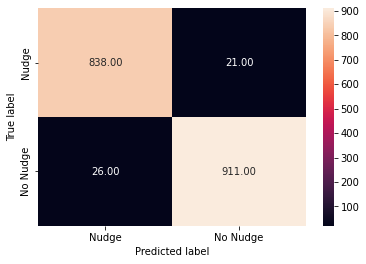

In [273]:
cm = draw_cm( y_test, y_pred )
cm

In [274]:
print( metrics.classification_report( y_test, y_pred ) )

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       859
           1       0.98      0.97      0.97       937

    accuracy                           0.97      1796
   macro avg       0.97      0.97      0.97      1796
weighted avg       0.97      0.97      0.97      1796



In [275]:
## The method takes the three following parameters
## model: the classification model
## test_X: X features of the test set
## test_y: actual labels of the test set
## Returns
##  - ROC Auc Score
##  - FPR and TPRs for different threshold values
def draw_roc_curve( model, test_X, test_y ):
    ## Creating and initializing a results DataFrame with actual labels
    test_results_df = pd.DataFrame( { 'actual':  test_y } )
    test_results_df = test_results_df.reset_index()

    # predict the probabilities on the test set
    predict_proba_df = pd.DataFrame( model.predict_proba( test_X ) )

    ## selecting the probabilities that the test example belongs to class 1
    test_results_df['chd_1'] = predict_proba_df.iloc[:,1:2]
    
    
    ## Invoke roc_curve() to return the fpr, tpr and threshold values.
    ## threshold values contain values from 0.0 to 1.0 
    fpr, tpr, thresholds = metrics.roc_curve( test_results_df.actual,
                                           test_results_df.chd_1,
                                           drop_intermediate = False )

    ## Getting the roc auc score by invoking metrics.roc_auc_score method
    auc_score = metrics.roc_auc_score( test_results_df.actual, test_results_df.chd_1  )

    ## Setting the size of the plot
    plt.figure(figsize=(8, 6))
    ## plotting the actual fpr and tpr values 
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    ## plotting th diagnoal line from (0,1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    ## Setting labels and titles
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic ')
    plt.legend(loc="lower right")
    plt.show()
    
    return auc_score, fpr, tpr, thresholds

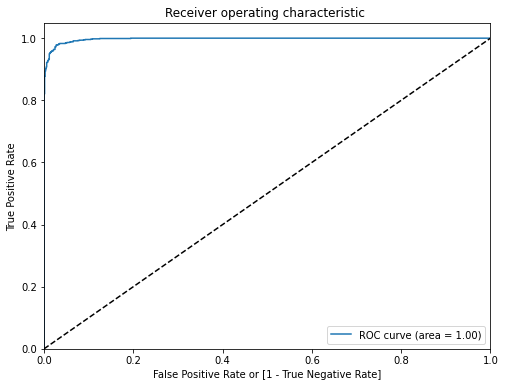

In [276]:
## Invoking draw_roc_curve with the logistic regresson model
_, _, _, _ = draw_roc_curve( logit, X_test, y_test )

In [277]:
y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob":  y_pred } )  

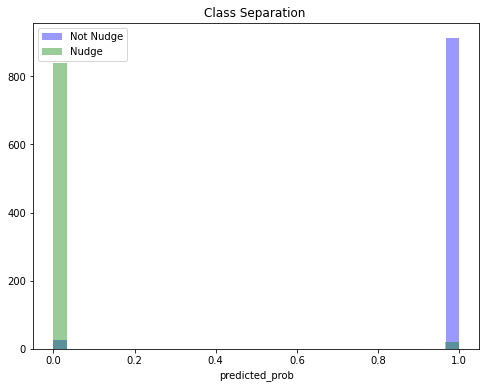

In [278]:
plt.figure( figsize = (8,6) )
sn.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], 
            kde=False, color = 'b', 
            label = 'Not Nudge' )
sn.distplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], 
            kde=False, color = 'g', 
            label = 'Nudge' )
plt.title('Class Separation ')
plt.legend()
plt.show()

### Model 2 - Gradient Boosting

XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

XGBoost builds upon: supervised machine learning, decision trees, ensemble learning, and gradient boosting.[6]

![image.png](attachment:image.png)
[4] Source: Wang, Weilun & Chakraborty, Goutam & Chakraborty, Basabi. (2020). Predicting the Risk of Chronic Kidney Disease (CKD) Using Machine Learning Algorithm. Applied Sciences. 11. 202. 10.3390/app11010202. 

[6] Source: https://www.nvidia.com/en-us/glossary/data-science/xgboost/

In [279]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier(max_depth=7,
    learning_rate=0.08,
    n_estimators=1000,
    verbosity=0,
    silent=None,
    objective='binary:logistic',
    booster='gbtree',
    tree_method='hist',
    predictor='cpu_predictor',                                       
    n_jobs=-1,
    nthread=None,
    gamma=1.5,
    min_child_weight=8,
    max_delta_step=0,
    subsample=0.8,
    reg_alpha=0,
    reg_lambda=1,
    base_score=0.75,
    random_state=0,
    seed=None)



In [280]:
np.random.seed(0)
clf_xgb.fit(X_train, y_train,
            eval_set=[(X_valid, y_valid)],
            early_stopping_rounds=20,
            verbose=10) 

[0]	validation_0-error:0.512114
Will train until validation_0-error hasn't improved in 20 rounds.
[10]	validation_0-error:0.005013
[20]	validation_0-error:0.005013
Stopping. Best iteration:
[4]	validation_0-error:0.005013



XGBClassifier(base_score=0.75, gamma=1.5, learning_rate=0.08, max_depth=7,
              min_child_weight=8, n_estimators=1000, n_jobs=-1,
              predictor='cpu_predictor', subsample=0.8, tree_method='hist',
              verbosity=0)

In [281]:
from sklearn.metrics import accuracy_score,roc_auc_score

preds = np.array(clf_xgb.predict_proba(X_valid))
valid_auc = roc_auc_score(y_score=preds[:,1], y_true=y_valid)
print(valid_auc)

preds = np.array(clf_xgb.predict_proba(X_test))
test_auc = roc_auc_score(y_score=preds[:,1], y_true=y_test)
print(test_auc)



0.9950250284922569
0.9966529296804628


In [282]:
preds

array([[0.16761273, 0.83238727],
       [0.5099366 , 0.49006343],
       [0.16761273, 0.83238727],
       ...,
       [0.16761273, 0.83238727],
       [0.16761273, 0.83238727],
       [0.16761273, 0.83238727]], dtype=float32)

In [283]:
y_pred = clf_xgb.predict(X_test)

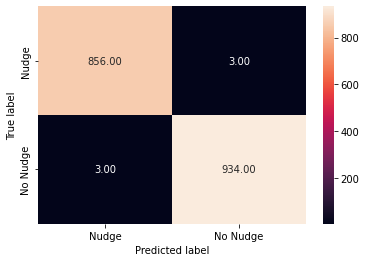

In [284]:
cm = draw_cm( y_test, y_pred)
cm

In [285]:
print( metrics.classification_report( y_test, y_pred ) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       859
           1       1.00      1.00      1.00       937

    accuracy                           1.00      1796
   macro avg       1.00      1.00      1.00      1796
weighted avg       1.00      1.00      1.00      1796



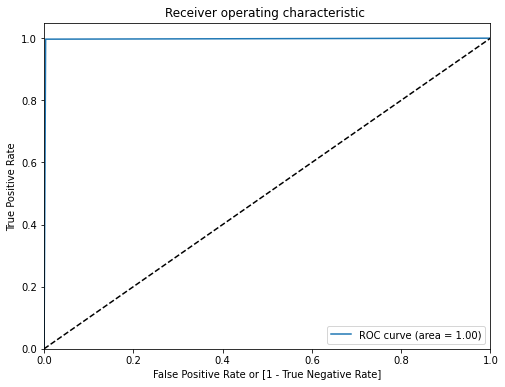

In [286]:
## Invoking draw_roc_curve with the XGB model
_, _, _, _ = draw_roc_curve( clf_xgb, X_test, y_test )

In [287]:
y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob":  y_pred } )  

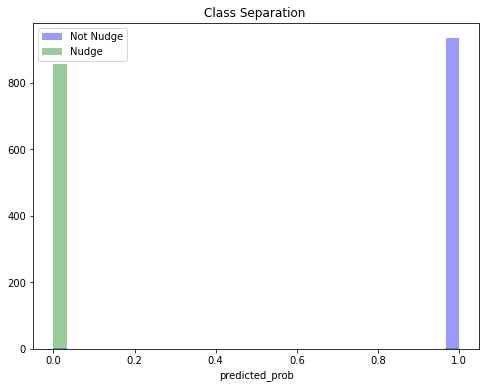

In [288]:
plt.figure( figsize = (8,6) )
sn.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], 
            kde=False, color = 'b', 
            label = 'Not Nudge' )
sn.distplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], 
            kde=False, color = 'g', 
            label = 'Nudge' )
plt.title('Class Separation ')
plt.legend()
plt.show()

### Model 3 - Self Supervised - Deep Learning based TabNet



##### Source: [8] https://arxiv.org/abs/1908.07442v5 in TabNet: Attentive Interpretable Tabular Learning

![image.png](attachment:image.png)

In [289]:
pip install pytorch-tabnet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [290]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier

np.random.seed(9)

clf = TabNetClassifier(
    n_d=64, n_a=64, n_steps=5,
    gamma=1.5, n_independent=2, n_shared=2,
    cat_idxs=cat_idxs,
    cat_dims=cat_dims,
    cat_emb_dim=1,
    lambda_sparse=1e-4, momentum=0.3, clip_value=2.,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=0.01),
    scheduler_params = {"gamma": 0.95,
                     "step_size": 20},
    scheduler_fn=torch.optim.lr_scheduler.StepLR, epsilon=1e-15
)

Device used : cuda


In [291]:
max_epochs = 1000
np.random.seed(99)
clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=['train', 'valid'],
    max_epochs=max_epochs, patience=100,
    batch_size=16384, virtual_batch_size=32,
   
)


epoch 0  | loss: 1.74052 | train_auc: 0.57381 | valid_auc: 0.54488 |  0:00:00s
epoch 1  | loss: 1.2747  | train_auc: 0.4824  | valid_auc: 0.48789 |  0:00:01s
epoch 2  | loss: 1.31705 | train_auc: 0.44321 | valid_auc: 0.45951 |  0:00:02s
epoch 3  | loss: 1.29752 | train_auc: 0.4157  | valid_auc: 0.42726 |  0:00:03s
epoch 4  | loss: 1.2336  | train_auc: 0.4802  | valid_auc: 0.49378 |  0:00:04s
epoch 5  | loss: 1.10238 | train_auc: 0.55489 | valid_auc: 0.53246 |  0:00:05s
epoch 6  | loss: 1.05634 | train_auc: 0.45442 | valid_auc: 0.45401 |  0:00:06s
epoch 7  | loss: 1.05396 | train_auc: 0.36406 | valid_auc: 0.35223 |  0:00:07s
epoch 8  | loss: 1.00354 | train_auc: 0.43999 | valid_auc: 0.42663 |  0:00:08s
epoch 9  | loss: 0.98342 | train_auc: 0.47338 | valid_auc: 0.48296 |  0:00:09s
epoch 10 | loss: 0.92294 | train_auc: 0.53059 | valid_auc: 0.54207 |  0:00:10s
epoch 11 | loss: 0.91678 | train_auc: 0.46016 | valid_auc: 0.45269 |  0:00:11s
epoch 12 | loss: 0.91859 | train_auc: 0.44766 | vali

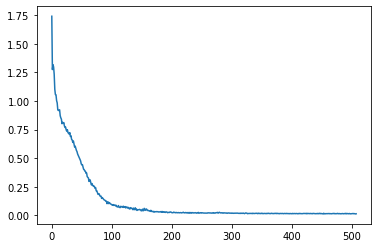

In [292]:

# plot losses
plt.plot(clf.history['loss']);

In [293]:
preds = clf.predict_proba(X_test)
preds

array([[4.1084252e-03, 9.9589157e-01],
       [9.9998081e-01, 1.9230652e-05],
       [5.6829929e-05, 9.9994314e-01],
       ...,
       [5.9111467e-06, 9.9999404e-01],
       [7.4974880e-05, 9.9992502e-01],
       [4.2653263e-01, 5.7346743e-01]], dtype=float32)

In [294]:
from sklearn.metrics import accuracy_score,roc_auc_score
dataset_name = "ThriveDX Dataset"

preds = np.array(clf.predict_proba(X_valid))
valid_auc = roc_auc_score(y_score=preds[:,1], y_true=y_valid)
#print(valid_auc)

preds = np.array(clf.predict_proba(X_test))
test_auc = roc_auc_score(y_score=preds[:,1], y_true=y_test)
#print(test_auc)

print(f"BEST VALID SCORE FOR {dataset_name} : {clf.best_cost}")
print(f"FINAL TEST AUC SCORE FOR {dataset_name} : {test_auc}")


BEST VALID SCORE FOR ThriveDX Dataset : 0.9996061364499765
FINAL TEST AUC SCORE FOR ThriveDX Dataset : 0.9985364332455774


In [295]:
y_pred = clf.predict(X_test)

print( metrics.classification_report( y_test, y_pred ) )

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       859
           1       1.00      0.99      1.00       937

    accuracy                           0.99      1796
   macro avg       0.99      1.00      0.99      1796
weighted avg       0.99      0.99      0.99      1796



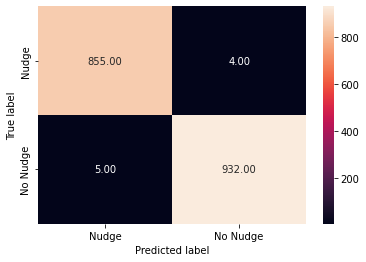

In [296]:
cm = draw_cm( y_test, y_pred)
cm

In [297]:
import pickle
 
# Save the trained model as a pickle string.
saved_model = pickle.dumps(clf)

from_pickle = pickle.loads(saved_model)


In [298]:
pred_y = from_pickle.predict(X_test)

In [299]:
loaded_test_acc = accuracy_score(y_pred=pred_y , y_true=y_test)

print(f"FINAL TEST SCORE FOR {dataset_name} : {loaded_test_acc}")



FINAL TEST SCORE FOR ThriveDX Dataset : 0.994988864142539


In [300]:
explain_matrix, masks = clf.explain(X_test)

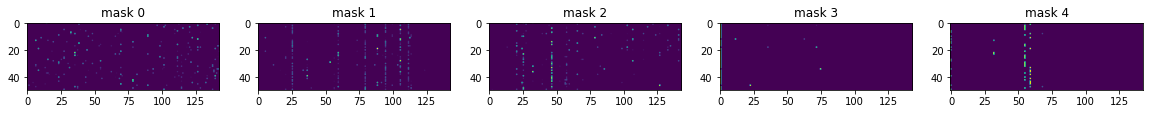

In [301]:
fig, axs = plt.subplots(1, 5, figsize=(20,20))

for i in range(5):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")


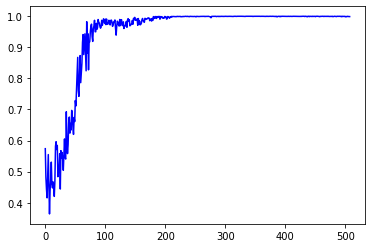

In [302]:

# plot auc
plt.plot(clf.history['train_auc'],color = 'blue');


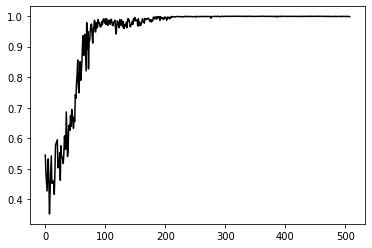

In [303]:

plt.plot(clf.history['valid_auc'],color = 'black');

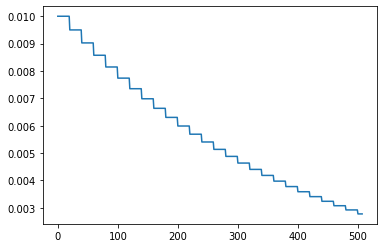

In [304]:


# plot learning rates
plt.plot(clf.history['lr']);



### Now we start with the implementation of recommendation task

In [305]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import uuid

### Importing the generated data from other algo, the algorithm works on data with predicted class labels as 1. Meaning it takes as input the dataframe like one shown below with predicted labels added as a column.

- The objective of the next segment of code is to Create a document library records for users who need nudge and use this as a labelled data for next program to recommend the solution for any user who need help.


- Flow of the logic used in the code:
- Input to this program is "merged-df-all-sessionsdata-with-timeincurrent.csv" file having the list of users of who need nudge for solving the problem.


- Idea here is to divide the users by  Current_bootcamp_course, current_module,current_challenge as every such combination will need a differeny set of solution. Say for a "CY	EthicalHacking	3" combination, there would be many users stuck at challenge 3 across different location, age and gender. For such combinations, we need to find what all users are similar by using K-means. 


- Before we do that, we will have to use categorical nature of gender and location which would lead to increased dimensions. To reduce the dimension, we used PCA to find key principle components such that we have lesser data for K-Means.


**Outcome of this code is to generate the file "userDocs.csv" which has got document ids for all users who needed nudge. This file will be used as a Labelled data for recommending the "Solution id i.e. Document id" should a user need one.**


In [306]:
link = 'https://drive.google.com/file/d/1dcxI-0UQnQxl9d_X0wt9pogHO6KPH49a/view?usp=sharing'
 
 
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('merged-df-all-sessionsdata-with-timeincurrent.csv') 
 
df = pd.read_csv('merged-df-all-sessionsdata-with-timeincurrent.csv')
df = df.drop('Unnamed: 0', axis=1)
df

,userid,gender,age,location,current_bootcamp_course,current_module,current_challenge,signup_app,device_type,browser,challenge_level,user_segment,secs_elapsed,NudgeX,date_account_created_day,date_account_created_month,date_account_created_year
0,8a3fdba53c,-unknown-,8,USA,CY,MicrosoftSecurity,8,MOB,Other/Unknown,-unknown-,2.0,1,120,0,3,4,2014
1,7d7425ba86,-unknown-,1,Spain,DS,BI,6,WEB,Windows Desktop,Firefox,2.0,0,120,0,4,11,2009
2,8949895560,MALE,4,India,DS,DataWrangling,7,WEB,Other/Unknown,Firefox,2.0,0,1920,1,1,5,2012
3,f1bb193059,MALE,4,China,DI,DA&Visualization,10,MOB,Other/Unknown,-unknown-,3.0,1,1620,1,6,5,2005
4,5852f67cb7,-unknown-,4,China,DI,E-Commerce,4,WEB,Other/Unknown,Chrome,1.0,0,720,0,0,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,5786647341,MALE,8,Vietnam,DS,DataWrangling,8,WEB,Mac Desktop,Firefox,2.0,1,1920,1,2,8,2010
8996,d65e7c15f6,FEMALE,2,India,UI,DigitalMarketing,1,MOB,Other/Unknown,Firefox,1.0,-1,1320,0,5,5,2017
8997,7826dee687,-unknown-,2,Japan,DI,SEM,8,MOB,Other/Unknown,Firefox,2.0,1,1020,0,0,4,2012
8998,342318020f,FEMALE,4,Italy,DI,WDforMarketers,8,MOB,iPhone,-unknown-,2.0,1,2070,1,1,7,2014


#### Filtering the records who needs nudge

In [307]:
tmpdf = df[df['NudgeX']==1]
tmpdf.head()

,userid,gender,age,location,current_bootcamp_course,current_module,current_challenge,signup_app,device_type,browser,challenge_level,user_segment,secs_elapsed,NudgeX,date_account_created_day,date_account_created_month,date_account_created_year
2,8949895560,MALE,4,India,DS,DataWrangling,7,WEB,Other/Unknown,Firefox,2.0,0,1920,1,1,5,2012
3,f1bb193059,MALE,4,China,DI,DA&Visualization,10,MOB,Other/Unknown,-unknown-,3.0,1,1620,1,6,5,2005
7,0b54c6e868,-unknown-,5,Indonesia,SO,Javascript&F-EWD,5,MOB,iPhone,Safari,2.0,2,2520,1,5,10,2012
11,1d7b5b4512,-unknown-,8,Japan,CY,DFIR&ThreatHunting,10,MOB,Other/Unknown,IE,3.0,1,1770,1,1,2,2017
12,4aad2538ee,-unknown-,1,Malaysia,UI,MicroInteractions,2,MOB,Other/Unknown,Firefox,1.0,2,1920,1,4,10,2012


#### Dropping the not needed columns

In [308]:
df = tmpdf.drop([
    'signup_app', 'device_type', 'browser', 'secs_elapsed', 'user_segment',
    'date_account_created_day', 'date_account_created_month', 'date_account_created_year'], axis=1)
df.head()

,userid,gender,age,location,current_bootcamp_course,current_module,current_challenge,challenge_level,NudgeX
2,8949895560,MALE,4,India,DS,DataWrangling,7,2.0,1
3,f1bb193059,MALE,4,China,DI,DA&Visualization,10,3.0,1
7,0b54c6e868,-unknown-,5,Indonesia,SO,Javascript&F-EWD,5,2.0,1
11,1d7b5b4512,-unknown-,8,Japan,CY,DFIR&ThreatHunting,10,3.0,1
12,4aad2538ee,-unknown-,1,Malaysia,UI,MicroInteractions,2,1.0,1


### Building groups by current_bootcamp_course,current_module,current_challenge to identify the users taking similar course at similar challenge

In [309]:
gdf = df.groupby(['current_bootcamp_course', 'current_module', 'current_challenge'])
gdf.head()

,userid,gender,age,location,current_bootcamp_course,current_module,current_challenge,challenge_level,NudgeX
2,8949895560,MALE,4,India,DS,DataWrangling,7,2.0,1
3,f1bb193059,MALE,4,China,DI,DA&Visualization,10,3.0,1
7,0b54c6e868,-unknown-,5,Indonesia,SO,Javascript&F-EWD,5,2.0,1
11,1d7b5b4512,-unknown-,8,Japan,CY,DFIR&ThreatHunting,10,3.0,1
12,4aad2538ee,-unknown-,1,Malaysia,UI,MicroInteractions,2,1.0,1
...,...,...,...,...,...,...,...,...,...
8946,c7ea42410c,-unknown-,7,USA,UI,UsabilityTesting,2,1.0,1
8948,38022bbe5e,-unknown-,8,Vietnam,UI,MicroInteractions,5,2.0,1
8969,2a6e150b28,MALE,8,China,DI,CRM,7,2.0,1
8989,b5a2afb503,-unknown-,7,Israel,DS,PythonProgramming,1,1.0,1


### Building multiple models for each group 

- [[p1, p2, p3], df] 

- [[p1, p2, p3], df], ...


### grouping records by bootcamp,module and challenge: This will hv all records of all age,challenge level,gender,location and now using PCA and K-means clustering to find clusters inside the group


#### People with in the same clusters will be given the same document id

In [310]:
lst = []
y = 0
for grp in gdf:
    #print(grp)
    dct = {}
    dct['current_bootcamp_course'] = grp[0][0]
    dct['current_module'] = grp[0][1]
    dct['current_challenge'] = grp[0][2]
    grpdf = grp[1]
    col_names = ['age', 'challenge_level']
    features = grpdf[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    scaled_features = pd.DataFrame(features, columns=col_names)
    tmpdf = grpdf[['gender', 'location']].reset_index()
    newdf = scaled_features.join(tmpdf)
    newdf = newdf.drop('index', axis=1)
    newdf = pd.get_dummies(newdf, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
    x = 4
    while True:
        try:
            pca = PCA(n_components=x)
            principalComponents = pca.fit_transform(newdf)
            PCA_components = pd.DataFrame(principalComponents)
            break
        except:
            if x == 0:
                raise
            x = x - 1
    clst = 4
    #print(PCA_components.iloc[:,:2])
    #break
    while True:
        try:
            model = KMeans(n_clusters=clst)
            model.fit(PCA_components.iloc[:,:2])
            
            pred = model.predict(PCA_components.iloc[:,:2])
            frame = pd.DataFrame(grpdf)
            frame['cluster'] = pred
            break
        except:
            if clst == 0:
                raise
            clst = clst - 1
    dct['frame'] = frame
    lst.append(dct)
    y += 1
    #print(dct)
    #print(lst)
    #break
    

In [311]:
for item in lst:
    tmp1 = {}
    tmp2 = []
    for cls in item['frame'].cluster.to_list():
        if not cls in tmp1:
            tmp1[cls] = uuid.uuid4().hex
        tmp2.append(tmp1[cls])
    item['frame']['doc_id'] = tmp2

In [312]:
finaldf = pd.concat([lst[i]['frame'] for i in range(0, len(lst))])

In [313]:
tmp = pd.merge(df, finaldf, how='outer')
tmp

,userid,gender,age,location,current_bootcamp_course,current_module,current_challenge,challenge_level,NudgeX,cluster,doc_id
0,8949895560,MALE,4,India,DS,DataWrangling,7,2.0,1,2,19411ef555a64d71bc394691152f01a8
1,f1bb193059,MALE,4,China,DI,DA&Visualization,10,3.0,1,2,1c193dfa221c4e0c827fbc78e452d887
2,0b54c6e868,-unknown-,5,Indonesia,SO,Javascript&F-EWD,5,2.0,1,1,a4d979d986724cd29f157f994704a04e
3,1d7b5b4512,-unknown-,8,Japan,CY,DFIR&ThreatHunting,10,3.0,1,0,6dd74a7ba75d4db5a2271cb998f1c4c8
4,4aad2538ee,-unknown-,1,Malaysia,UI,MicroInteractions,2,1.0,1,2,266adcb9494a4165a4ddd959ff51be93
...,...,...,...,...,...,...,...,...,...,...,...
4471,5e6bce477a,-unknown-,3,USA,UI,ConductingResearch,3,1.0,1,0,33288aa0a0ff40ffbc6ef365b667617d
4472,336d013c20,FEMALE,6,Canada,DS,DataStorytelling,6,2.0,1,0,4e6b2cf5a2414686bc5bcd5180e435c3
4473,ee7e37e4e2,FEMALE,2,Malaysia,DI,SMM,1,1.0,1,2,249b875d98564c80be0a65e08c56d393
4474,5786647341,MALE,8,Vietnam,DS,DataWrangling,8,2.0,1,1,888a24434c264b9788c18373e6cf99b8


In [314]:
tmp=tmp.drop("cluster",axis=1)
#tmp.to_csv('userDocs.csv')

### Creating Nudge Deployment System

- This code uses the file generated by the above code i.e. "userDocsData.csv".  **We could not use typical recommendation systems here as there is a need to find only one recommendation for a given user for a particular combination of Current_bootcamp_course,current_module current_challenge.** 


- Hence we decided to make use of a Linear regression model in this case to find a recommended document id. Only challenge is that each combination of "Current_bootcamp_course,current_module,current_challenge" will have separate data set and a separate model.


In [315]:
# Importing Libraries

import math
import random
import string

In [316]:
link = 'https://drive.google.com/file/d/1N_5S47bwcgVdmUf8zYjhc11y-wp4O2Cv/view?usp=sharing'
 
 
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('userDocs.csv') 
 
df = pd.read_csv('userDocs.csv')
df = df.drop('Unnamed: 0', axis=1)
df = df.set_index('userid')
df


,gender,age,location,current_bootcamp_course,current_module,current_challenge,challenge_level,NudgeX,doc_id
userid,,,,,,,,,
1ecc080233,-unknown-,5,USA,UI,ConductingResearch,1,1.0,1,36ffb13a23a944b5a27ab95e926e6b6f
68f86bba62,-unknown-,8,France,SO,Python,1,1.0,1,cadba054feb1417d9db2be9726e36a71
76d5238bac,-unknown-,9,Malaysia,DS,ML,2,1.0,1,9df65cfda08e4e82b38a89a5965404ce
a89e6b5bfb,-unknown-,4,Australia,DS,AdvancedSQL,8,2.0,1,efc76bf431d045c692526557b0729970
c311cfd932,MALE,6,Sweden,DS,ML,6,2.0,1,b0a539c0011d4abaac04cd8f55d75f23
...,...,...,...,...,...,...,...,...,...
270a625d54,-unknown-,6,Indonesia,DI,SEM,9,3.0,1,0dd65f75fe0c4cb591ec0379fdcea6f0
fa974f291c,-unknown-,7,Sweden,CY,PythonforSecurity,8,2.0,1,0a4ba5ec5ee04a11b78e437acd3dc293
2b2d98186b,-unknown-,7,Indonesia,UI,FrontEnd,5,2.0,1,b2bd594ac19042eb8a41288ebb41f17e


In [317]:
# total users with document IDs
df.doc_id.dropna().count()

4463

In [318]:
df.doc_id.value_counts()

42db437e80a0470aa489df7730604604    7
46ac0574d29f4cd58c1b1c29ed461d2c    7
cd4392f13a834fa28e643ab0bd0742a2    7
68ffdcbfc1a24652bdd8230e1c5d1174    7
ba4362ed8ebd42208c8c1a78d42f6b92    6
                                   ..
410638b113f54755896d48425bd00726    1
d9ef1af42a564e13b4f32447b8ad3e34    1
b9e8cfb66b6f463c9b39912941e261fe    1
043247a911024c4291ecb548ae1fdcab    1
877db97afa894f2aae3f91c032a74052    1
Name: doc_id, Length: 2131, dtype: int64

In [319]:
def isnan(value):
    try:
        return math.isnan(value)
    except:
        return False

In [320]:
x = 1
cache = {}
txc = []
for unq in df.doc_id.values:
    if isnan(unq):
        txc.append(math.nan)
    elif unq in cache:
        txc.append(cache[unq])
    else:
        cache[unq] = x
        x += 1
        txc.append(cache[unq])
        
        
df['doc_ref_id'] = txc
df

,gender,age,location,current_bootcamp_course,current_module,current_challenge,challenge_level,NudgeX,doc_id,doc_ref_id
userid,,,,,,,,,,
1ecc080233,-unknown-,5,USA,UI,ConductingResearch,1,1.0,1,36ffb13a23a944b5a27ab95e926e6b6f,1
68f86bba62,-unknown-,8,France,SO,Python,1,1.0,1,cadba054feb1417d9db2be9726e36a71,2
76d5238bac,-unknown-,9,Malaysia,DS,ML,2,1.0,1,9df65cfda08e4e82b38a89a5965404ce,3
a89e6b5bfb,-unknown-,4,Australia,DS,AdvancedSQL,8,2.0,1,efc76bf431d045c692526557b0729970,4
c311cfd932,MALE,6,Sweden,DS,ML,6,2.0,1,b0a539c0011d4abaac04cd8f55d75f23,5
...,...,...,...,...,...,...,...,...,...,...
270a625d54,-unknown-,6,Indonesia,DI,SEM,9,3.0,1,0dd65f75fe0c4cb591ec0379fdcea6f0,2129
fa974f291c,-unknown-,7,Sweden,CY,PythonforSecurity,8,2.0,1,0a4ba5ec5ee04a11b78e437acd3dc293,2130
2b2d98186b,-unknown-,7,Indonesia,UI,FrontEnd,5,2.0,1,b2bd594ac19042eb8a41288ebb41f17e,1798


In [321]:
# total unique document IDs
df.doc_ref_id.max()

2131

### Filtering users who are currently stuck and need a `nudge` from the file predictions done by other algorithm

In [322]:
tmpdf = df[df['NudgeX']==1]
tmpdf.head()

,gender,age,location,current_bootcamp_course,current_module,current_challenge,challenge_level,NudgeX,doc_id,doc_ref_id
userid,,,,,,,,,,
1ecc080233,-unknown-,5,USA,UI,ConductingResearch,1,1.0,1,36ffb13a23a944b5a27ab95e926e6b6f,1
68f86bba62,-unknown-,8,France,SO,Python,1,1.0,1,cadba054feb1417d9db2be9726e36a71,2
76d5238bac,-unknown-,9,Malaysia,DS,ML,2,1.0,1,9df65cfda08e4e82b38a89a5965404ce,3
a89e6b5bfb,-unknown-,4,Australia,DS,AdvancedSQL,8,2.0,1,efc76bf431d045c692526557b0729970,4
c311cfd932,MALE,6,Sweden,DS,ML,6,2.0,1,b0a539c0011d4abaac04cd8f55d75f23,5


### Creating groups based on `current_bootcamp_course` | `current_module` | `current_challenge`

#### Also creating  a dictionary store based on grouped data for later drill down

In [323]:
from functools import partial
from collections import defaultdict

docdct = defaultdict(partial(defaultdict, partial(defaultdict, dict)))
docdf = tmpdf[['current_bootcamp_course', 'current_module', 'current_challenge', 'doc_ref_id', 'doc_id']]
for grps in docdf.groupby(['current_bootcamp_course', 'current_module', 'current_challenge']):
    tdct = grps[1][['doc_id', 'doc_ref_id']].values
    for ix in tdct:
        docdct[grps[0][0]][grps[0][1]][grps[0][2]][ix[1]] = ix[0]

In [324]:
docdct

defaultdict(functools.partial(<class 'collections.defaultdict'>, functools.partial(<class 'collections.defaultdict'>, <class 'dict'>)),
            {'CY': defaultdict(functools.partial(<class 'collections.defaultdict'>, <class 'dict'>),
                         {'CloudSecurity': defaultdict(dict,
                                      {1: {173: '32d9a98ad1a14baf99e69db78fba2de9',
                                        1143: '32925cf0db4b4b3bbae42aaa26fc4d44',
                                        1293: 'ff1d6330d3f041d3831fa5960f5acd3d',
                                        1365: 'dc0d47b0b534446fb6a59cbe526ae122'},
                                       2: {162: '37e8250280ad4c2fb961e8a686a9ab4b',
                                        728: 'e65d1b6e39d04c04836cc738ac8bf6bc',
                                        856: '32403dd678d24e4fad8ea98529e41488',
                                        1415: '9c7457635490427984880c0b66618f1d'},
                                       3: 

In [325]:
rdf = tmpdf
rdf.head()

,gender,age,location,current_bootcamp_course,current_module,current_challenge,challenge_level,NudgeX,doc_id,doc_ref_id
userid,,,,,,,,,,
1ecc080233,-unknown-,5,USA,UI,ConductingResearch,1,1.0,1,36ffb13a23a944b5a27ab95e926e6b6f,1
68f86bba62,-unknown-,8,France,SO,Python,1,1.0,1,cadba054feb1417d9db2be9726e36a71,2
76d5238bac,-unknown-,9,Malaysia,DS,ML,2,1.0,1,9df65cfda08e4e82b38a89a5965404ce,3
a89e6b5bfb,-unknown-,4,Australia,DS,AdvancedSQL,8,2.0,1,efc76bf431d045c692526557b0729970,4
c311cfd932,MALE,6,Sweden,DS,ML,6,2.0,1,b0a539c0011d4abaac04cd8f55d75f23,5


In [326]:
gdf = rdf.groupby(['current_bootcamp_course', 'current_module', 'current_challenge'])
gdf.head()

,gender,age,location,current_bootcamp_course,current_module,current_challenge,challenge_level,NudgeX,doc_id,doc_ref_id
userid,,,,,,,,,,
1ecc080233,-unknown-,5,USA,UI,ConductingResearch,1,1.0,1,36ffb13a23a944b5a27ab95e926e6b6f,1
68f86bba62,-unknown-,8,France,SO,Python,1,1.0,1,cadba054feb1417d9db2be9726e36a71,2
76d5238bac,-unknown-,9,Malaysia,DS,ML,2,1.0,1,9df65cfda08e4e82b38a89a5965404ce,3
a89e6b5bfb,-unknown-,4,Australia,DS,AdvancedSQL,8,2.0,1,efc76bf431d045c692526557b0729970,4
c311cfd932,MALE,6,Sweden,DS,ML,6,2.0,1,b0a539c0011d4abaac04cd8f55d75f23,5
...,...,...,...,...,...,...,...,...,...,...
b515060016,MALE,4,Israel,CY,NetworkSecurity,3,1.0,1,9536a02716714e80801e0292c487a85f,2089
f04dd3eb87,-unknown-,9,Israel,DS,BigData,2,1.0,1,c62c9d9d37024027816b7a7b45190a98,2125
06e5a6b28b,MALE,1,India,UI,ConductingResearch,7,2.0,1,adec67976c604532ad3b2a671dfa2594,2126


#### Creating `Linear Regression` model for each group i.e. `by current_bootcamp_course`|`by current_module`|`by current_challenge` and training it over the test data

#### Outcome of this would be individual models [represented by class] `by current_bootcamp_course`|`by current_module`|`by current_challenge` with seperate training and test data

#### Example:
<h3>
{
'current_bootcamp_course': 'CY',
'current_module': 'CloudSecurity',
'current_challenge': 1,
'model': LinearRegression()
}
</h3>


In [327]:
from sklearn.linear_model import LinearRegression

lst = []
for grp in gdf:
    dct = {}
    dct['current_bootcamp_course'] = grp[0][0]
    dct['current_module'] = grp[0][1]
    dct['current_challenge'] = grp[0][2]
    grp = grp[1]
    X = grp[['age', 'gender', 'location', 'challenge_level']]
    X = pd.get_dummies(data=X, drop_first=True)
    if len(X) == 1:
        X_train = X
        y_train = grp.doc_ref_id
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, grp.doc_ref_id, test_size=0.1, random_state=101)
    model = LinearRegression()
    model.fit(X_train,y_train)
    dct['model'] = model
    lst.append(dct)
    

In [328]:
tmp = defaultdict(partial(defaultdict, dict))
for item in lst:
    tmp[item['current_bootcamp_course']][item['current_module']][item['current_challenge']] = {
        'model': item['model']}
    

In [329]:
# example
lst[0:4]

[{'current_bootcamp_course': 'CY',
  'current_module': 'CloudSecurity',
  'current_challenge': 1,
  'model': LinearRegression()},
 {'current_bootcamp_course': 'CY',
  'current_module': 'CloudSecurity',
  'current_challenge': 2,
  'model': LinearRegression()},
 {'current_bootcamp_course': 'CY',
  'current_module': 'CloudSecurity',
  'current_challenge': 3,
  'model': LinearRegression()},
 {'current_bootcamp_course': 'CY',
  'current_module': 'CloudSecurity',
  'current_challenge': 4,
  'model': LinearRegression()}]

#### Creating prediction function that will take `usedid | index` as input and will return the `doc_id` as output

#### `get_doc_id` must be used to fetch the `doc_id` required by the users who need a nudge

#### Example:
<h3>
get_doc_id('8e92f272bf') >> '5071c8fb812c4f51b003fe5e969479ff'
</h3>


In [330]:
def predict(userid):
    dcv = rdf[rdf.index == userid].iloc[0]
    grp = rdf[(rdf.current_bootcamp_course==dcv['current_bootcamp_course']) & (rdf.current_module==dcv['current_module']) & (rdf.current_challenge==dcv['current_challenge'])]
    X = grp[['age', 'gender', 'location', 'challenge_level']]
    X = pd.get_dummies(data=X, drop_first=True)
    model = tmp[dcv['current_bootcamp_course']][dcv['current_module']][dcv['current_challenge']]['model']
    X = X[X.index == userid]
    predictions = model.predict(X)
    return predictions[0]

In [331]:
def get_doc_id(userid):
    pred = predict(userid)
    dcv = rdf[rdf.index == userid].iloc[0]
    return docdct[dcv['current_bootcamp_course']][dcv['current_module']][dcv['current_challenge']][float(round(pred))]


In [332]:
# example
get_doc_id('8e92f272bf')

'43aa3527de2f45f99e04eb7a48e34c7e'

In [333]:
pred = []
for ind in df[df['NudgeX']==1].index.to_list():
    pred.append(predict(ind))

#### Plotting the `regression graph` for true values and predicted values

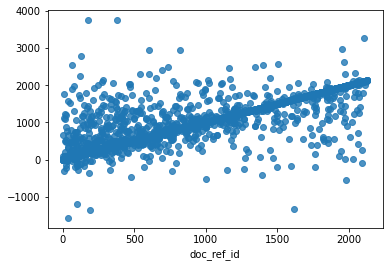

In [334]:
sns.regplot(df[df['NudgeX']==1].doc_ref_id,pred);

#### Fetching the `accuracy score`|`Mean Absolute Error`|`Mean Squared Error`|`Root Mean Squared Error` of the overall program

In [335]:
acc = metrics.accuracy_score(list(df[df['NudgeX']==1].doc_ref_id.values),[float(round(s)) for s in pred])
print(f'Accuracy -> {acc}')

Accuracy -> 0.7900515348420345


In [336]:
r2 = metrics.r2_score(list(df[df['NudgeX']==1].doc_ref_id.values),[float(round(s)) for s in pred])
print(f'r2_score -> {r2}')

r2_score -> 0.7492993210000077


In [337]:
rmse = np.sqrt(metrics.mean_squared_error(list(df[df['NudgeX']==1].doc_ref_id.values),[float(round(s)) for s in pred]))
print(f'Root Mean Squared Error -> {rmse}')

Root Mean Squared Error -> 296.3468666647752


#### Conclusions:

- By implementing this project code we have learnt first hand why data engineering and cleaning takes maximum time in creating good ML models.


- We saw the power of GLM, Gradient Boosting and Self supervised algorithms, the interesting. Also we learnt first hand why Deep Learning based architectures out perform most known ML techniques.


- Finally we were succesfully able to predict NudgeX, and hence create a very specific recommendation to a segment of users who are similar. In a scenario like this our recommendation is not going to be generic but very specific to that Course -Module - Challenge combination by using PCA and Linear regression.

In [338]:
#__END__